<a href="https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src='https://seeklogo.com/images/S/stone-pagamentos-logo-781DFFF629-seeklogo.com.png'/> 



Este notebook foi criado para responder às perguntas do [Conta Stone's Data Intern Challenge](https://gist.github.com/caiotaniguchi/8b5ee7dc75c8b6426222942ced90c4c1#file-dataset-customers-csv-L2469).

**Respostas:**


*   [What is the average age of the customers in the database?](https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb#scrollTo=EcU_VrIx1kih&line=2&uniqifier=1)
*   [How is the card family ranked based on the credit_limit given to each card?](https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb#scrollTo=IkelZEYwBJIC)
* [For the transactions flagged as fraud, what are the ids of the transactions with the highest value?](https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb#scrollTo=uouxHNxCYN2s)
* [Analyze whether or not the fraudulent transactions are somehow associated to other features in the dataset. Explain your results.](https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb#scrollTo=7ptgwGOs2zSB)



In [1]:
# Import das bibliotecas mais usadas em ciência de dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Criando DataFrames para cada dataset disponibilizado
card_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-cards.csv"

customers_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-customers.csv"

fraud_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63\
/dataset-frauds.csv"

transactions_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-transactions.csv"


df_card = pd.read_csv(card_url, sep=';')

df_customers = pd.read_csv(customers_url, sep=';')

df_fraud = pd.read_csv(fraud_url, sep=';')

df_transactions = pd.read_csv(transactions_url, sep=';')



---



**Questões**



1.   *Extract and analyze the data in order to answer the following questions. Provide a description and/or comments for each solution.*



- What is the average age of the customers in the database?

In [3]:
# pegando a coluna age (idade)
age = df_customers['age']

# pegando a média de idades
avg_age = age.mean()

# printando a idade média arredondada com duas casas depois da vírgula
print("The average age of the customers in the database is {} years old. \
(Approximately {} years and {} days old.)"\
      .format(round(avg_age, 2), round(avg_age), round((avg_age-int(avg_age))*365)))

The average age of the customers in the database is 35.06 years old. (Approximately 35 years and 22 days old.)




---



- How is the card_family ranked based on the credit_limit given to each card?

Antes de responder, olhei se um customer tinha mais que um cartão.

In [5]:
customer_id = df_card['customer_id']
df_card.loc[df_card['customer_id'].isin(customer_id[customer_id.duplicated()])].sort_values(by='customer_id')

credit_limit
count      36.000000
mean   277555.555556
std    286170.922397
min      5000.000000
25%     42750.000000
50%    156000.000000
75%    488250.000000
max    835000.000000

Note que existem sim customers com mais de um cartão. Entretanto isso não interfere na resposta desta pergunta. Note inclusive que alguns customers possuem cartões com card families diferentes, mas que há sim uma grande diferença entre os limites de crédito destes cartões.

Inicialmente pensei em olhar para a média de limite de crédito, entretanto olhei primeiro para a quantidade de cada card_family no dataset, pois uma pequena quantidade de uma determinada card_family poderia acarretar uma grande média de credit_limit, o que enviesaria a análise. Além disso, há também o fator que a média é mais suscetível a outliers, portanto talvez não seja um bom indicador para responder a pergunta.

Entretanto eis os gráficos:

In [6]:
# Pegando todas as distintas card_families no dataset
card_families = np.unique(df_card['card_family'])

# Pegando a quantidade de cada card_family no dataset
family_quantity = [(family, df_card['card_family'].loc\
                    [df_card.card_family == family]\
                   .count()) for family in card_families]

"""
Ordenando family_quantity na ordem decrescente, baseado na quantidade daquela
card_family
"""
family_quantity.sort(key=lambda qty: qty[1], reverse=True)

# Separando a card_family de sua quantidade
family_quantity = zip(*family_quantity)
family_quantity = list(family_quantity)

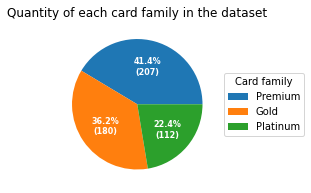

In [7]:
"""
Plotando um gráfico de setores com os resultados 
sobre as quantidades de card_family
"""

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = family_quantity[1]
card_families = family_quantity[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Card family",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantity of each card family in the dataset")

plt.show()

Plotando um gráfico de barras para visualizar a média de limite de crédito (credit_limit) para cada card_family

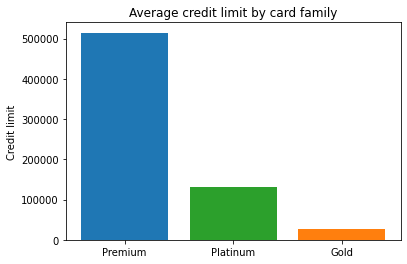

In [8]:
# Pegando a média de credit_limit para cada card_family
avg_credit_limit = [(family, np.array(df_card['credit_limit'].loc\
                                      [df_card.card_family == family]).mean())\
                     for family in card_families]

# Ordenando avg_credit_limit em ordem descrescente pela média daquela card_family
avg_credit_limit.sort(key=lambda family_credit_limit: family_credit_limit[1], \
                      reverse=True)

# Separando a card_family de sua média
avg_credit_limit = zip(*avg_credit_limit)
avg_credit_limit = list(avg_credit_limit)

# Plotando o gráfico
plt.bar(avg_credit_limit[0], avg_credit_limit[1], color=['tab:blue', 'tab:green', 'tab:orange'])
plt.title("Average credit limit by card family")
plt.ylabel("Credit limit")
plt.show()

Como vimos, a quantidade de cada card_family é diferente e média é bem discrepante entre cada card_family.

*Eis uma melhor visualização de como credit limit está rankeado de acordo com card family.*

Plotei o credit_limit de todos os cartões (com as mesmas cores dos gráficos acima).

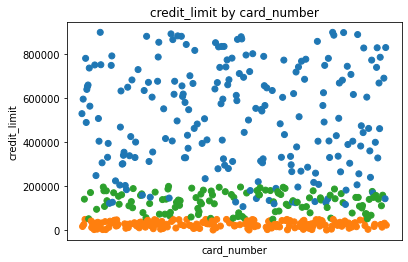

In [9]:
x = df_card['card_number']
y = df_card['credit_limit']
z = df_card['card_family']

colors = []
for card in z:
  if card == 'Premium':
    colors.append('tab:blue')
  elif card == 'Platinum':
    colors.append('tab:green')
  elif card == 'Gold':
    colors.append('tab:orange')

plt.scatter(x, y, color=colors)
plt.ylabel("credit_limit")
plt.xlabel("card_number")
plt.xticks([]) # apenas para tirar os xticks
plt.title("credit_limit by card_number")
plt.show()

Como podemos ver, é fácil de enxergar 3 grupos distintos no gráfico acima, cada grupo simbolizando uma card_family. Neste gráfico podemos ver, por exemplo, que Premium (azul) costuma ter um limite de crédito maior que as outras card families. Platinum (verde) costuma ter um limite de crédito maior apenas que Gold (laranja).



---



 - For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

In [10]:
# Pegando o id das transações fraudulentas (organizados do maior value para o menor)
frauds = np.array(df_fraud['transaction_id'].loc[df_fraud['fraud_flag'] == True])
df_fraud_transactions = df_transactions.loc[df_transactions['id'].isin(frauds)]
df_fraud_transactions = df_fraud_transactions.sort_values(by='value', ascending=False)
for i in range(1, len(list(df_fraud_transactions['id']))+1):
  print("{}º id: {}".format(i, list(df_fraud_transactions['id'])[i-1]))

1º id: CTID20567160
2º id: CTID15034243
3º id: CTID95884307
4º id: CTID54759604
5º id: CTID55429304
6º id: CTID29469747
7º id: CTID76723439
8º id: CTID85085771
9º id: CTID25962688
10º id: CTID60575167
11º id: CTID42980186
12º id: CTID63762180
13º id: CTID31867370
14º id: CTID40881434
15º id: CTID41847490
16º id: CTID81479835
17º id: CTID89116114
18º id: CTID30763806
19º id: CTID32907279
20º id: CTID23350804
21º id: CTID69782227
22º id: CTID96772424
23º id: CTID26134025
24º id: CTID89260233
25º id: CTID12270763
26º id: CTID26238474
27º id: CTID53972836
28º id: CTID91108283
29º id: CTID84024131
30º id: CTID98722314
31º id: CTID89585938
32º id: CTID21246201
33º id: CTID39550827
34º id: CTID49517337
35º id: CTID55853142
36º id: CTID57707566
37º id: CTID42582298
38º id: CTID55936882
39º id: CTID16281374
40º id: CTID57357592
41º id: CTID95859840
42º id: CTID71795114
43º id: CTID22306254
44º id: CTID37742156
45º id: CTID13865418
46º id: CTID88342446
47º id: CTID97760025
48º id: CTID87470159
4



---



2. *Analysis:*

- Analyze whether or not the fraudulent transactions are somehow associated to other features in the dataset. Explain your results.

Primeiro eu vou analisar alguns dados sobre as transações fraudulentas.

In [11]:
# DataFrame com os dados dos cartões que já estiveram envolvidos em fraude
df_cards_involved_in_fraud = df_card.loc[df_card['card_number'].isin(df_fraud_transactions['card_number'])]

In [12]:
# Pegando em quantas transações fraudulentas o valor passou ou foi igual ao limite de crédito do cartão em questão
cards = np.unique(df_cards_involved_in_fraud['card_number'])

higher = 0

for card in cards:
  transactions = df_fraud_transactions['value'].loc[df_fraud_transactions['card_number'] == card]
  card_limit = df_cards_involved_in_fraud['credit_limit'].loc[df_cards_involved_in_fraud['card_number'] == card]
  for transaction in transactions:
    if transaction >= int(card_limit):
      higher += 1

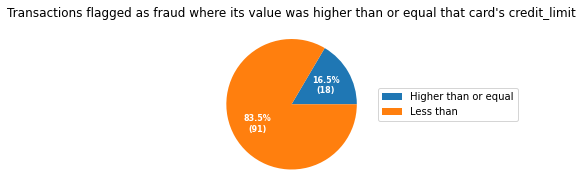

In [13]:
# Plotando um gráfico de setores mostrando os resultados da última célula

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = [higher, df_fraud_transactions['id'].count()-higher]
card_families = ["Higher than or equal", "Less than"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Transactions flagged as fraud where its value was higher than or equal that card's credit_limit")

plt.show()

In [14]:
customers = np.unique(df_cards_involved_in_fraud['customer_id'])

customer_cards_involved_in_frauds = df_customers.loc[df_customers['id'].isin(customers)]

In [15]:
# média de idade dos customers com cartões envolvidos em fraude (é bem próxima da média de idade do dataset de customers, portanto não diz tanta coisa)
avg_age_frauds = customer_cards_involved_in_frauds['age'].mean()
print("Average age of customers whose cards where involved in fraud: {} years old.".format(round(avg_age_frauds, 2)))

Average age of customers whose cards where involved in fraud: 34.66 years old.


In [16]:
families = np.unique(customer_cards_involved_in_frauds['segment']) 
data = [(seg, customer_cards_involved_in_frauds['segment'].loc[customer_cards_involved_in_frauds['segment'] == seg].count()) for seg in families]
data

[('Diamond', 48), ('Gold', 25), ('Platinum', 24)]

In [17]:
data = zip(*data)
data1 = list(data)
data1

[('Diamond', 'Gold', 'Platinum'), (48, 25, 24)]

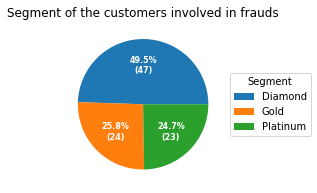

In [18]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Segment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Segment of the customers involved in frauds")

plt.show()

In [19]:
vg = np.unique(customer_cards_involved_in_frauds['vintage_group']) 
data = [(v, customer_cards_involved_in_frauds['vintage_group'].loc[customer_cards_involved_in_frauds['vintage_group'] == v].count()) for v in vg]
data

[('VG1', 48), ('VG2', 24), ('VG3', 25)]

In [20]:
data = zip(*data)
data1 = list(data)
data1

[('VG1', 'VG2', 'VG3'), (48, 24, 25)]

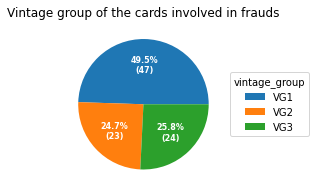

In [21]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="vintage_group",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Vintage group of the cards involved in frauds")

plt.show()

Olhando os dois gráficos de setores acima eu imagino que vintage_group tenha a ver com o segment do customer, mas não tenho certeza pois não entendi o que significa vintage_group.

Como o dataset de fraudes tinha poucas colunas, decidi marcar as transações fraudulentas com uma flag no próprio DataFrame de transações.

In [22]:
df_transactions['is_fraud'] = [0 for i in range(df_transactions['id'].count())]
df_transactions

id          card_number  ... segment  is_fraud
0     CTID28830551  1629-9566-3285-2123  ...   SEG25         0
1     CTID45504917  3697-6001-4909-5350  ...   SEG16         0
2     CTID47312290  5864-4475-3659-1440  ...   SEG14         0
3     CTID25637718  5991-4421-8476-3804  ...   SEG17         0
4     CTID66743960  1893-8853-9900-8478  ...   SEG14         0
...            ...                  ...  ...     ...       ...
9995  CTID25037573  9157-2802-8374-1145  ...   SEG18         0
9996  CTID43832298  7416-4529-6690-5703  ...   SEG12         0
9997  CTID56532072  6699-2639-4522-6219  ...   SEG13         0
9998  CTID88101446  8341-5263-4582-7396  ...   SEG14         0
9999  CTID64730271  1947-8602-1695-7503  ...   SEG15         0

[10000 rows x 6 columns]

In [23]:
frauds = np.array(df_fraud_transactions['id'])
for fraud in frauds:
  df_transactions['is_fraud'].loc[df_transactions['id'] == fraud] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)




---



Tornando variáveis categóricas em variáveis numéricas pois isso facilita muito da análise (correlação, etc).

In [24]:
df_transactions['segment'] = list(map(lambda x: int(x[3:]), list(df_transactions['segment'])))
df_transactions.head()

id          card_number transaction_date  value  segment  is_fraud
0  CTID28830551  1629-9566-3285-2123       2016-04-24  23649       25         0
1  CTID45504917  3697-6001-4909-5350       2016-02-11  26726       16         0
2  CTID47312290  5864-4475-3659-1440       2016-11-01  22012       14         0
3  CTID25637718  5991-4421-8476-3804       2016-01-28  37637       17         0
4  CTID66743960  1893-8853-9900-8478       2016-03-17   5113       14         0

In [25]:
import datetime

df_transactions['transaction_date'] = list(
    map(
        lambda x: datetime.datetime(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2])), 
        list(df_transactions['transaction_date'])
        )
    )

In [26]:
df_transactions = df_transactions.sort_values(by='transaction_date')

In [27]:
segments = {
    'Diamond': 1,
    'Gold': 2,
    'Platinum': 3
}
df_customers['segment'] = list(map(lambda x: segments[x], list(df_customers['segment'])))
df_customers.head()

id  age  segment vintage_group
0  CC25034   35        1           VG1
1  CC59625   22        1           VG1
2  CC69314   33        1           VG1
3  CC67036   46        1           VG1
4  CC25597   44        1           VG1

In [28]:
df_customers['vintage_group'] = list(map(lambda x: int(x[2:]), list(df_customers['vintage_group'])))
df_customers.head()

id  age  segment  vintage_group
0  CC25034   35        1              1
1  CC59625   22        1              1
2  CC69314   33        1              1
3  CC67036   46        1              1
4  CC25597   44        1              1

In [29]:
df_customers.corr()

age   segment  vintage_group
age            1.000000 -0.005755      -0.005863
segment       -0.005755  1.000000       0.607736
vintage_group -0.005863  0.607736       1.000000

Acima eu vejo que minha suspeita estava equivocada. Segment é correlato com vintage_group, mas não é uma correlação forte.

In [30]:
card_family = {
    'Premium': 1,
    'Gold': 2,
    'Platinum': 3
}
df_card['card_family'] = list(map(lambda x: card_family[x], list(df_card['card_family'])))

In [31]:
df_card['customer_id'] = list(map(lambda x: int(x[2:]), list(df_card['customer_id'])))

In [32]:
df_customers['id'] = list(map(lambda x: int(x[2:]), list(df_customers['id'])))

In [33]:
df_cards_involved_in_fraud['customer_id'] = list(map(lambda x: int(x[2:]), list(df_cards_involved_in_fraud['customer_id'])))
df_cards_involved_in_fraud.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


card_number card_family  credit_limit  customer_id
14  7214-4915-6387-5429    Platinum        172000        72302
18  6239-8641-8524-9441        Gold         26000        18438
22  6228-9033-3508-8121        Gold         33000        36771
23  1466-1600-9312-7604     Premium        249000        60926
26  7586-6475-9618-3909        Gold         37000        51908

In [34]:
card_fraud = np.unique(df_cards_involved_in_fraud['card_number'])

df_transactions = df_transactions.sort_values(by='transaction_date')
df_transactions

id          card_number  ... segment  is_fraud
7976  CTID79649665  2463-9055-1240-3878  ...      11         0
4807  CTID74037563  6315-7338-3105-9947  ...      18         0
1876  CTID82497421  1749-4777-2532-7766  ...      25         0
1561  CTID70644003  9999-3058-2698-4238  ...      11         0
8726  CTID21418659  9517-7826-1862-6726  ...      21         0
...            ...                  ...  ...     ...       ...
9430  CTID43094492  7658-7645-4568-1461  ...      15         0
4735  CTID16143048  1438-6906-2509-8219  ...      14         0
1418  CTID98844242  1749-4777-2532-7766  ...      23         0
2736  CTID82609500  2517-1247-3682-9050  ...      11         0
156   CTID21977092  6272-7021-2748-1471  ...      25         0

[10000 rows x 6 columns]

In [35]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7976 to 156
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  object        
 1   card_number       10000 non-null  object        
 2   transaction_date  10000 non-null  datetime64[ns]
 3   value             10000 non-null  int64         
 4   segment           10000 non-null  int64         
 5   is_fraud          10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 546.9+ KB


Desconfio que uma fraude possa se mostrar em valores muito grandes, ou numa frequência alta de transações. Por isso adicionei a coluna week_number, onde adicionei qual semana do ano era aquela quando ocorreu a transação, para poder analisar uma média ou algo assim.

In [36]:
import datetime
df_transactions['week_number'] = [date.strftime('%U') for date in df_transactions['transaction_date']]
df_transactions

id          card_number  ... is_fraud  week_number
7976  CTID79649665  2463-9055-1240-3878  ...        0           00
4807  CTID74037563  6315-7338-3105-9947  ...        0           00
1876  CTID82497421  1749-4777-2532-7766  ...        0           00
1561  CTID70644003  9999-3058-2698-4238  ...        0           00
8726  CTID21418659  9517-7826-1862-6726  ...        0           00
...            ...                  ...  ...      ...          ...
9430  CTID43094492  7658-7645-4568-1461  ...        0           52
4735  CTID16143048  1438-6906-2509-8219  ...        0           52
1418  CTID98844242  1749-4777-2532-7766  ...        0           52
2736  CTID82609500  2517-1247-3682-9050  ...        0           52
156   CTID21977092  6272-7021-2748-1471  ...        0           52

[10000 rows x 7 columns]

In [37]:
weeks = np.unique(df_transactions['week_number'])

media = []
for card in card_fraud:
  for week in weeks:
    qty = df_transactions['value'].loc[(df_transactions.card_number == card) & (df_transactions.week_number == week)].count()
    if qty > 0:
      m = round(df_transactions['value'].loc[(df_transactions.card_number == card) & (df_transactions.week_number == week)].sum() / \
      qty, 2)
    else:
      m = 0

    media.append((card, m, week))

Abaixo a semana da fraude está marcada em vermelho.

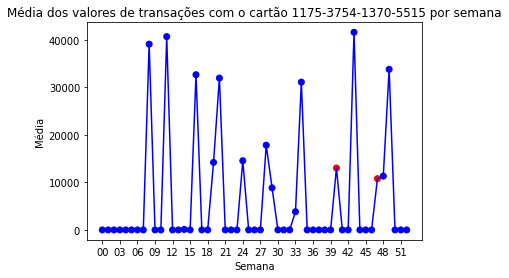

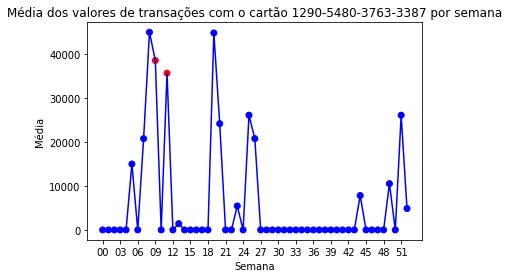

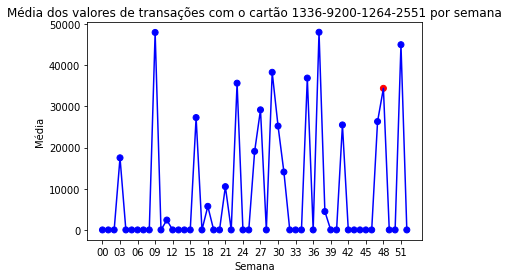

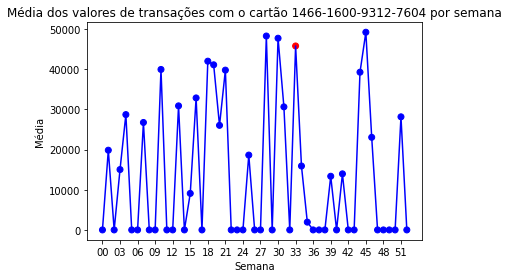

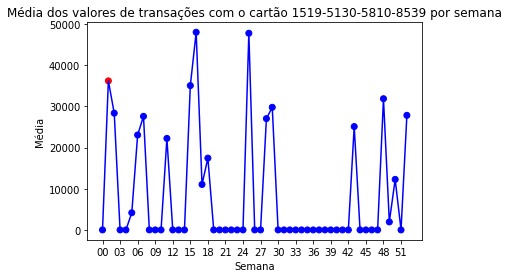

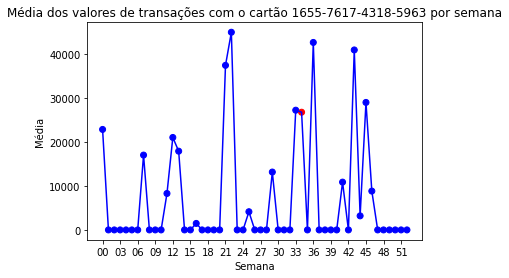

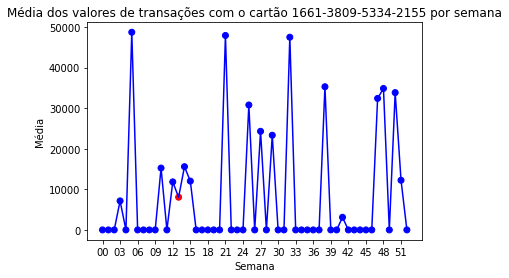

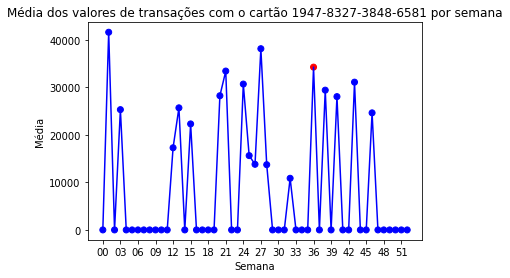

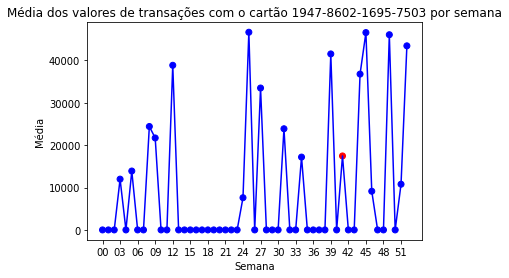

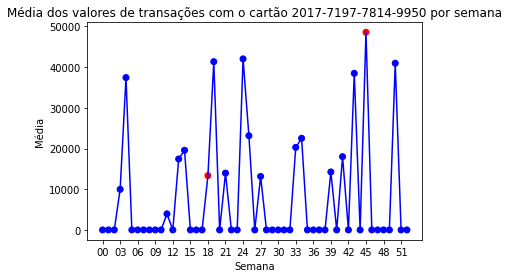

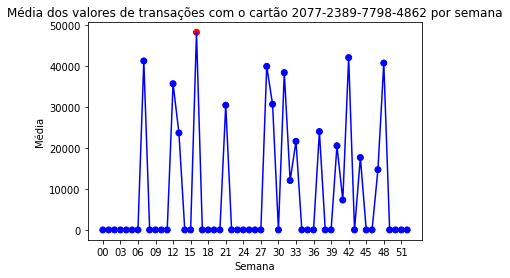

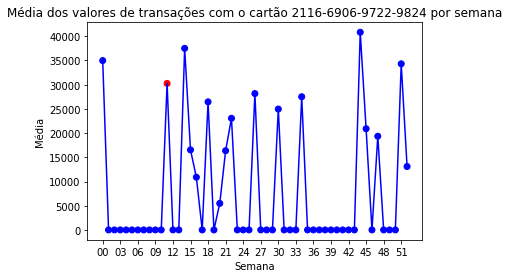

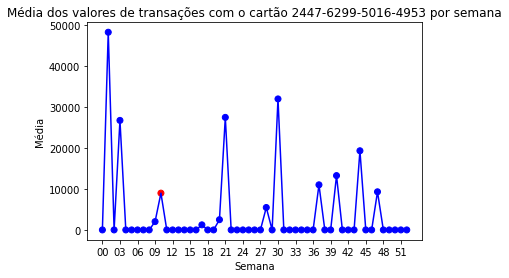

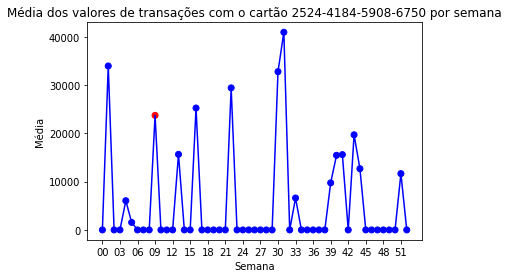

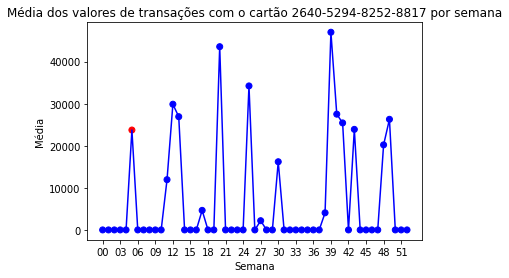

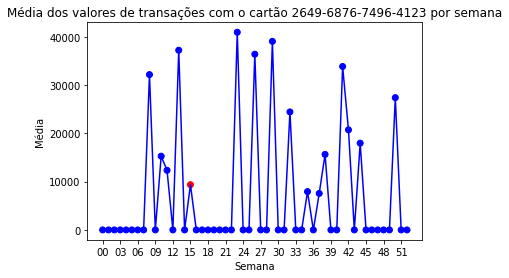

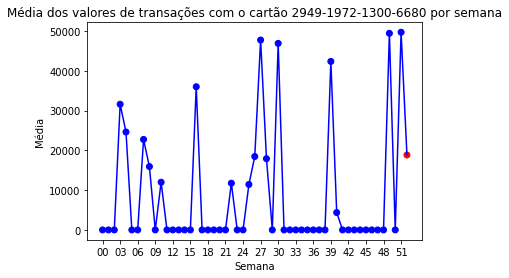

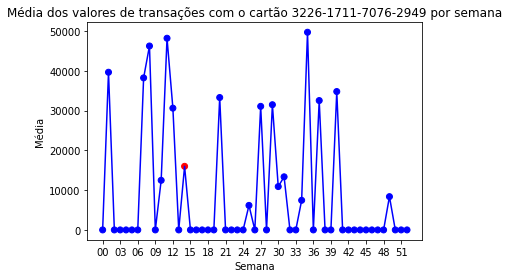

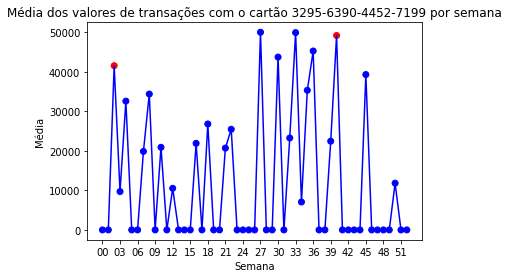

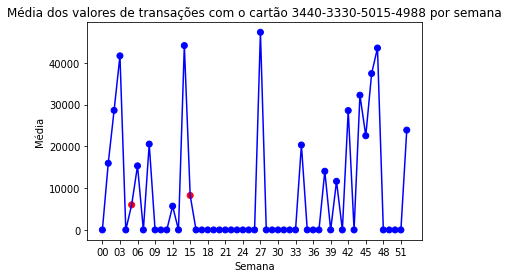

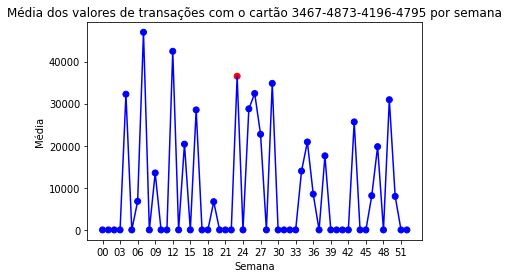

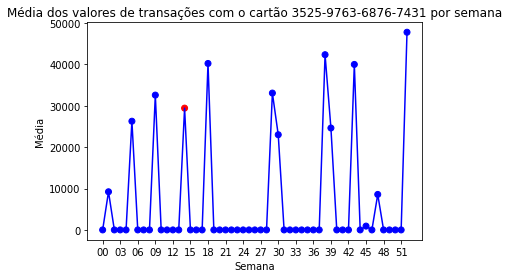

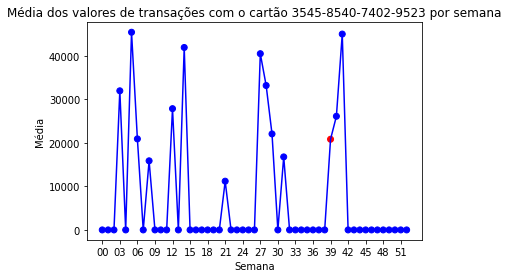

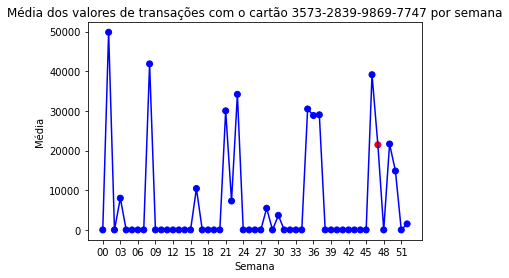

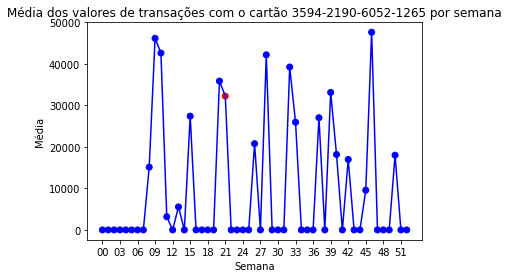

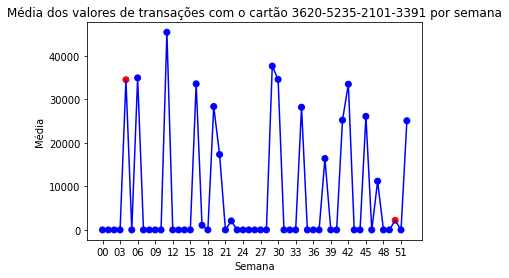

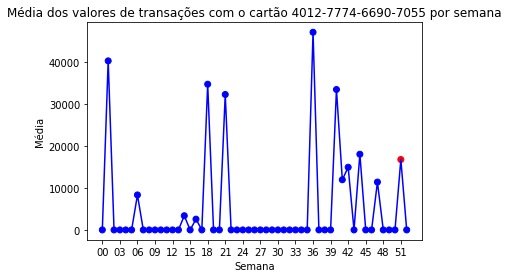

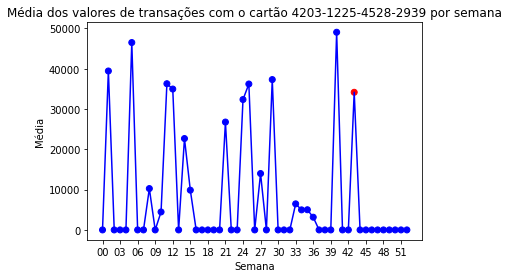

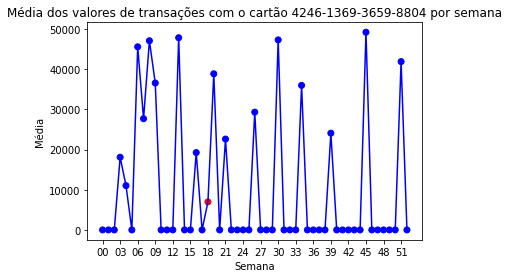

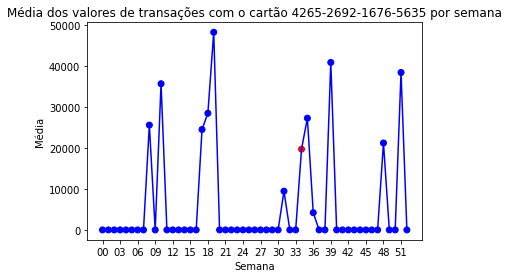

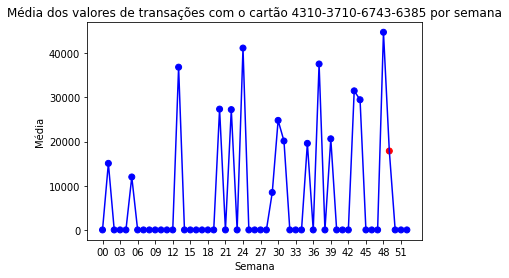

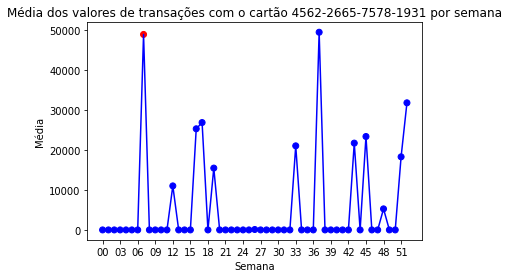

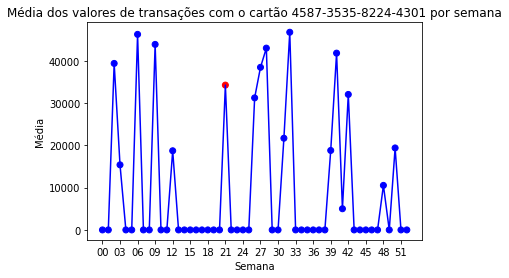

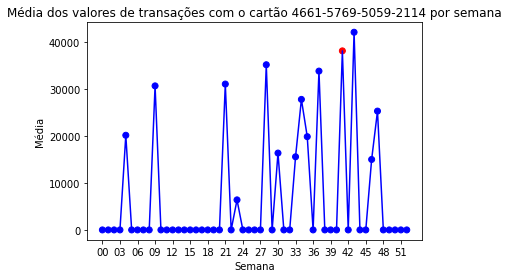

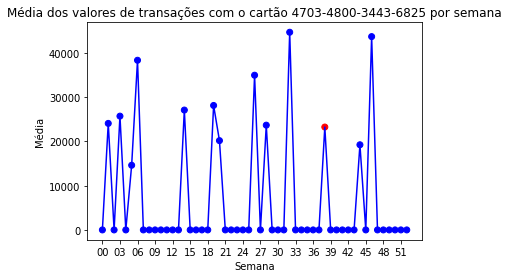

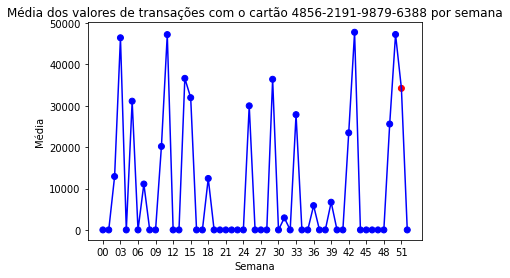

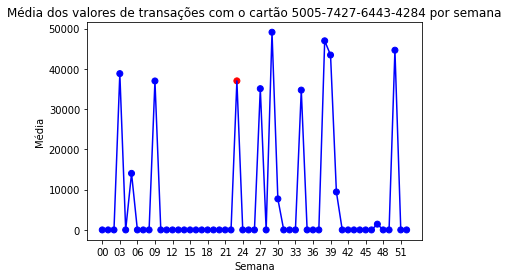

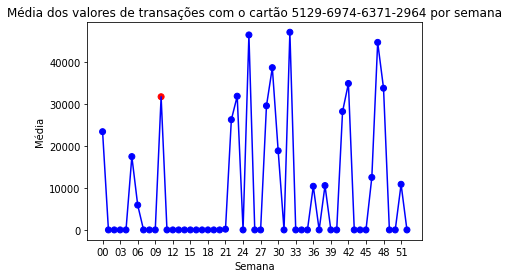

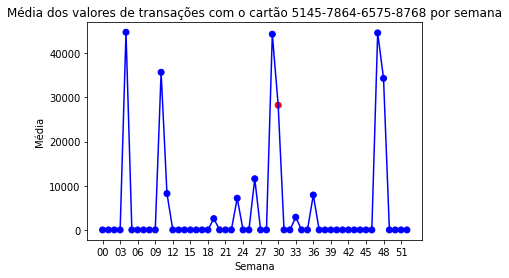

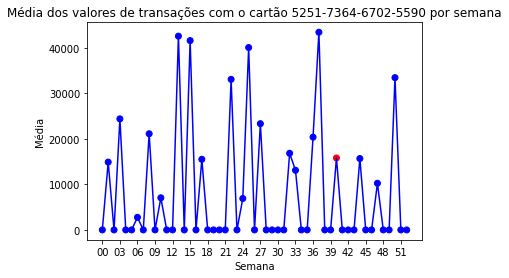

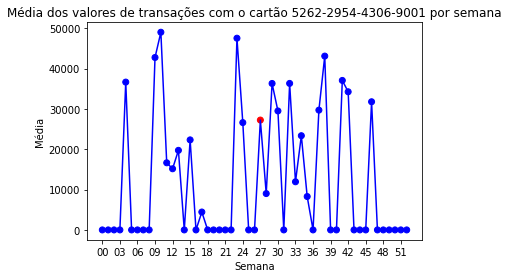

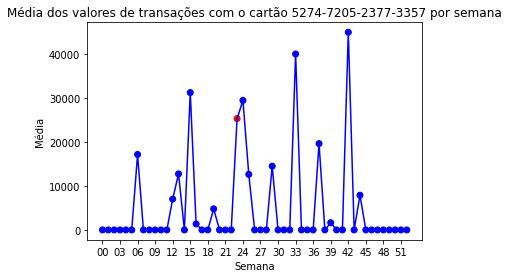

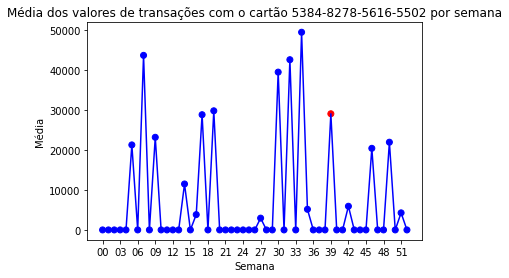

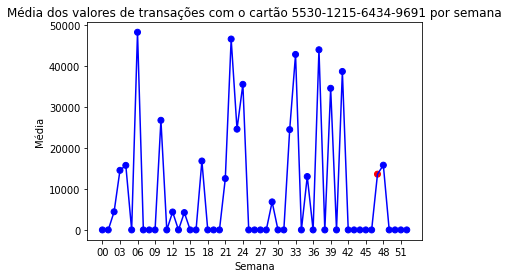

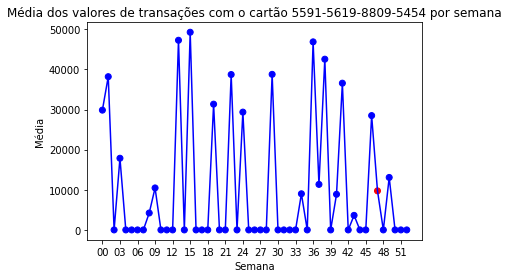

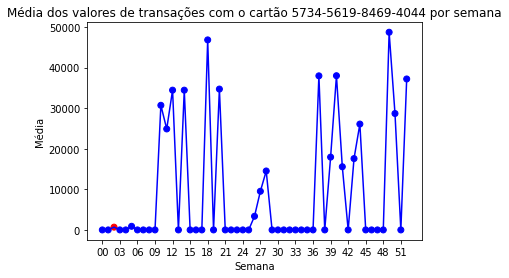

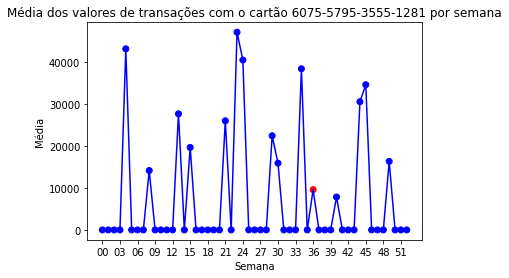

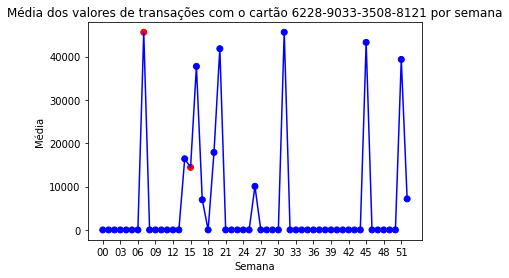

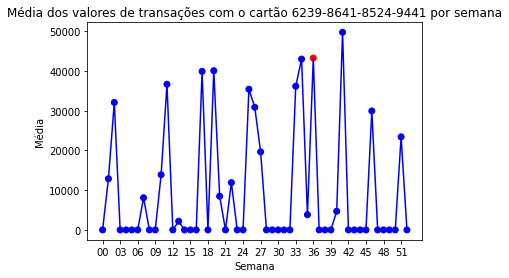

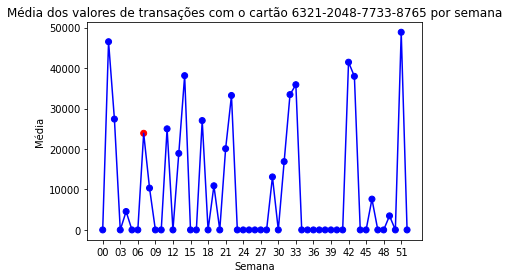

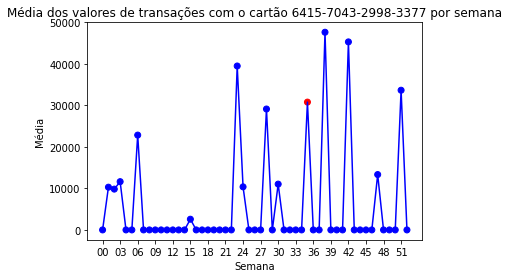

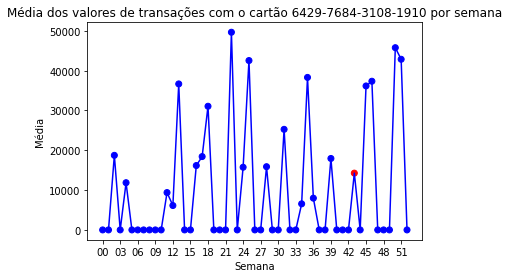

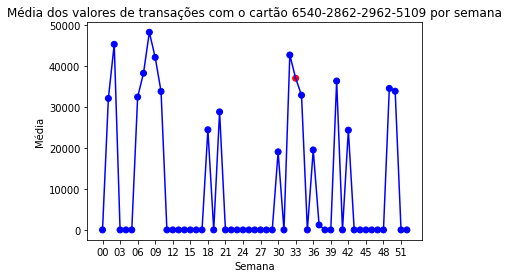

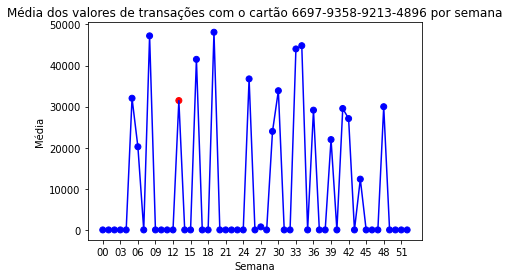

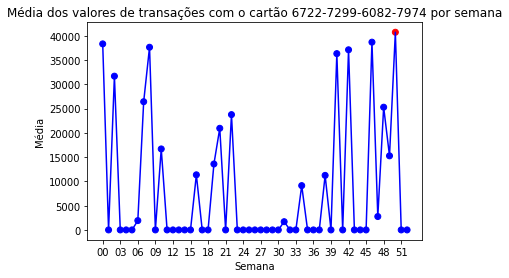

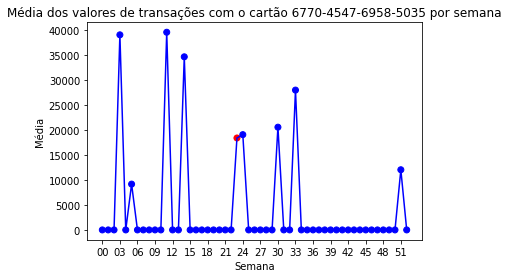

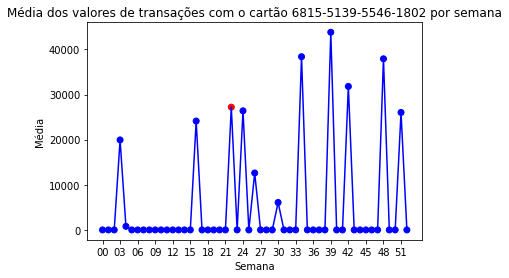

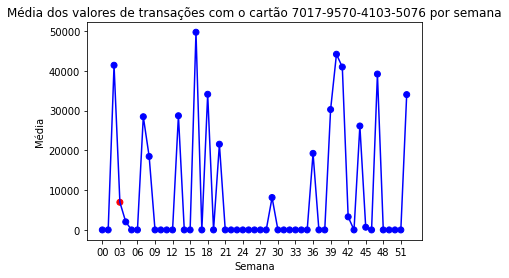

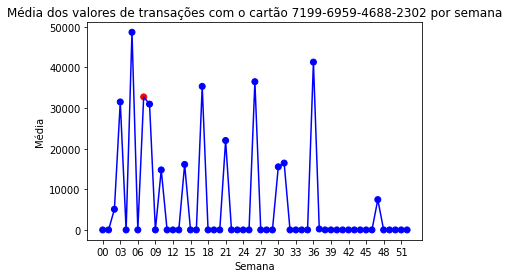

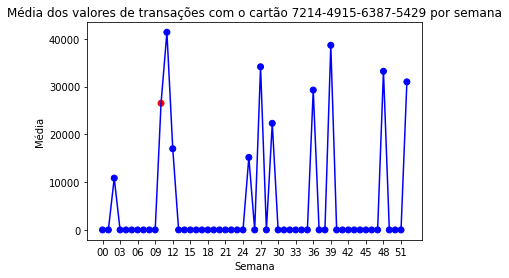

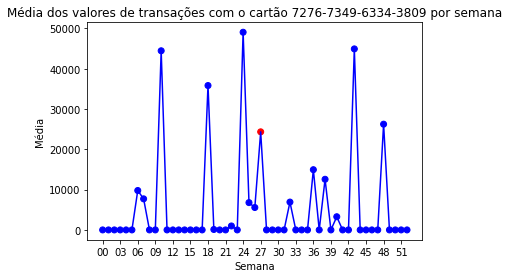

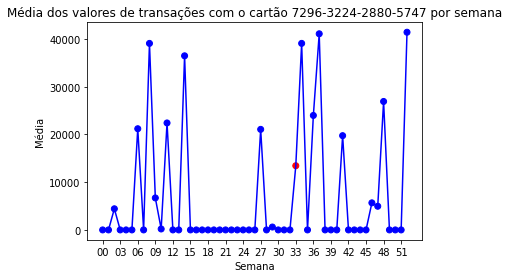

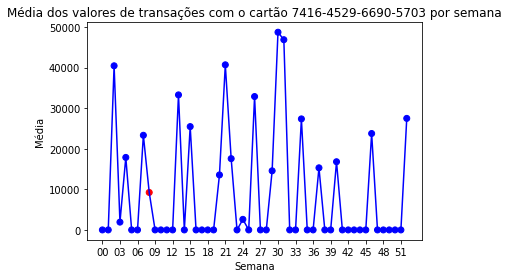

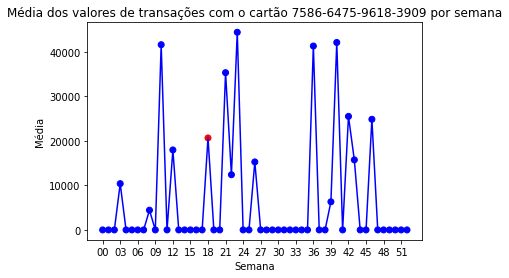

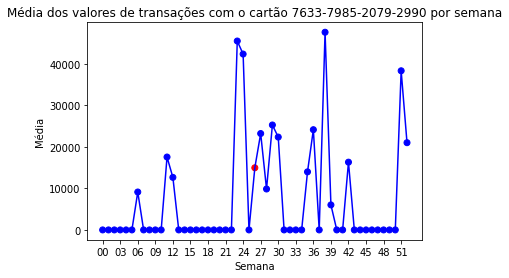

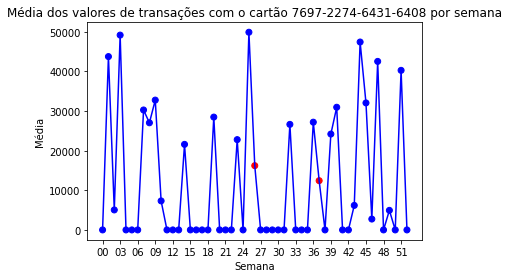

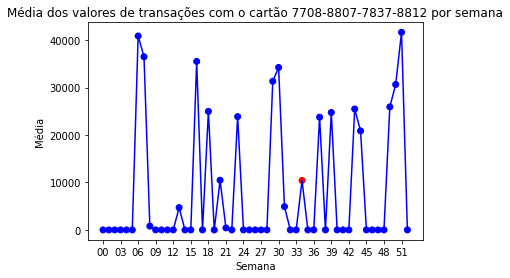

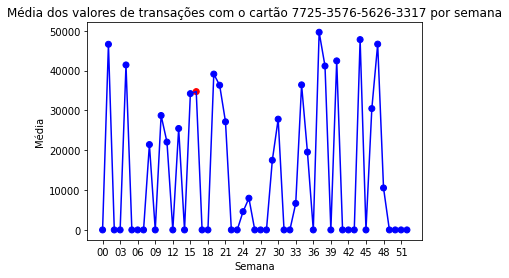

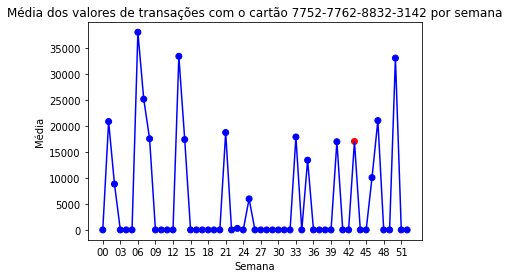

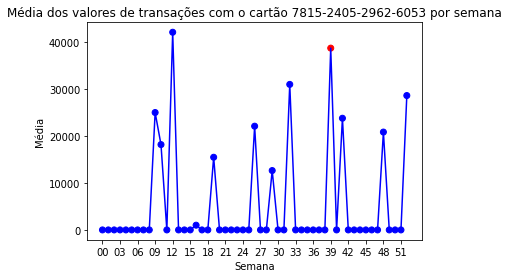

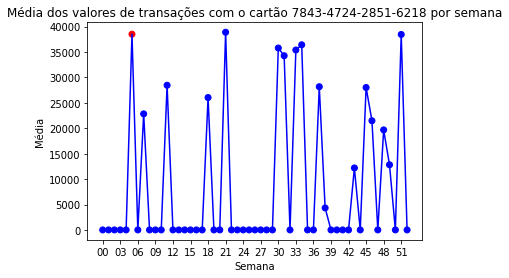

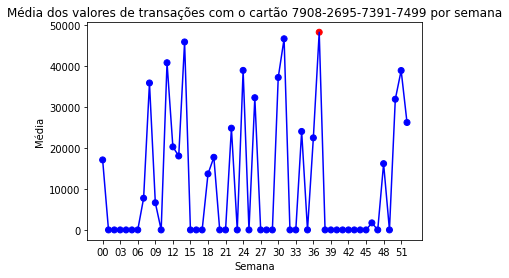

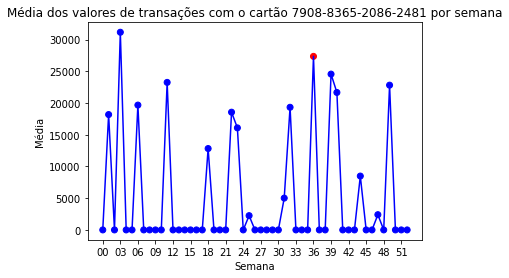

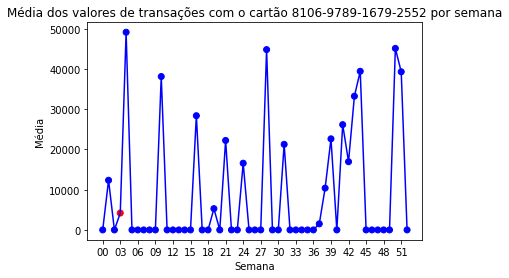

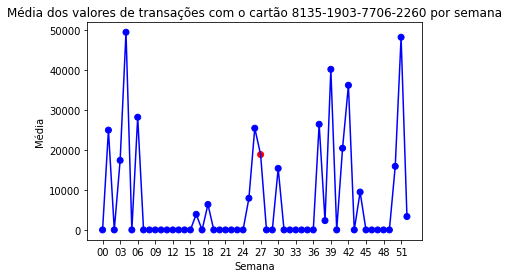

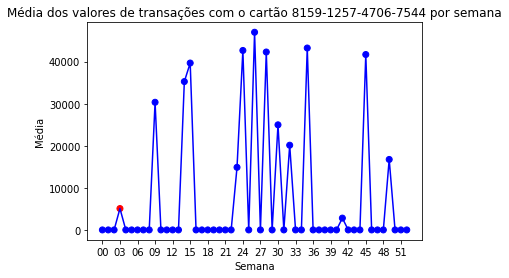

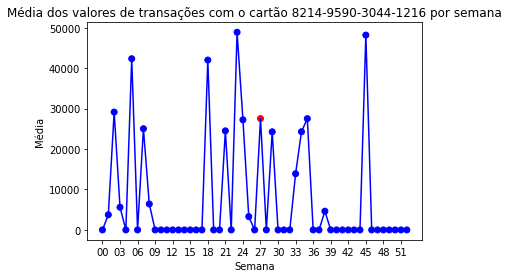

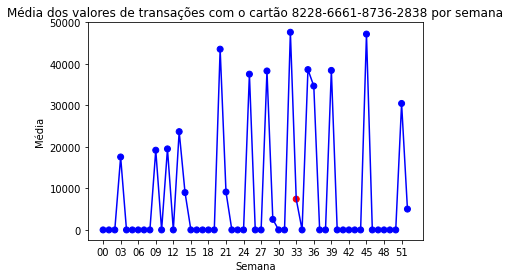

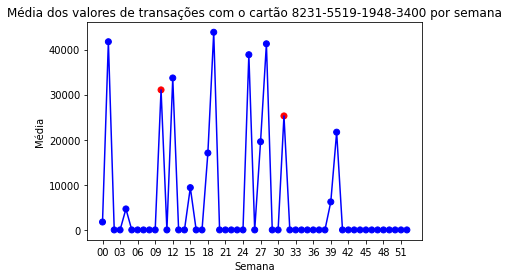

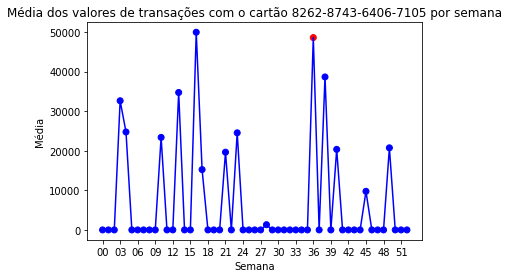

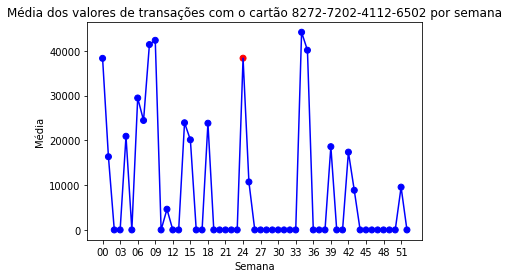

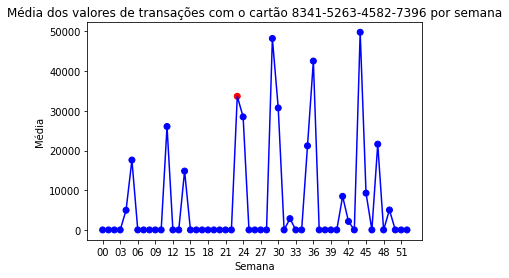

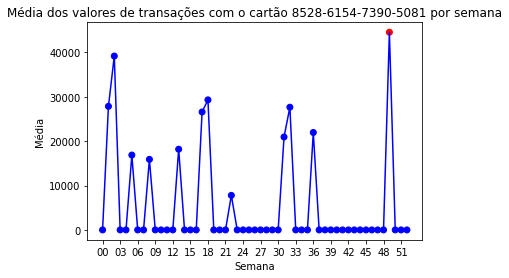

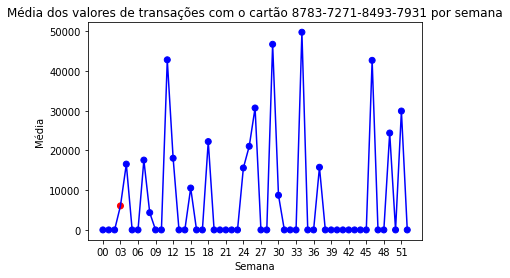

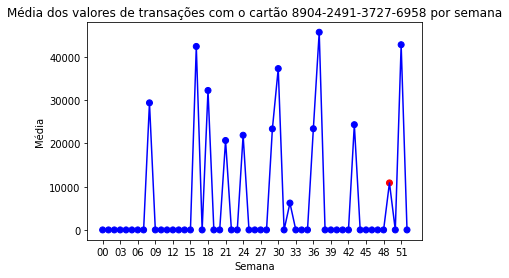

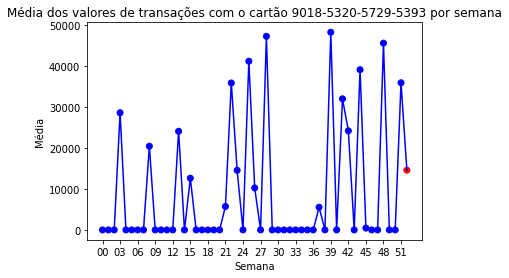

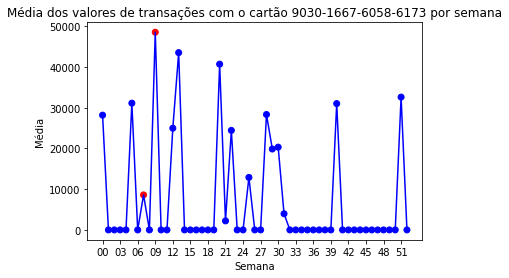

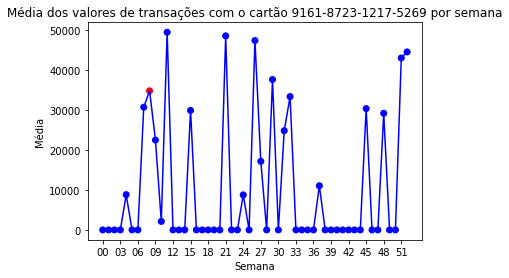

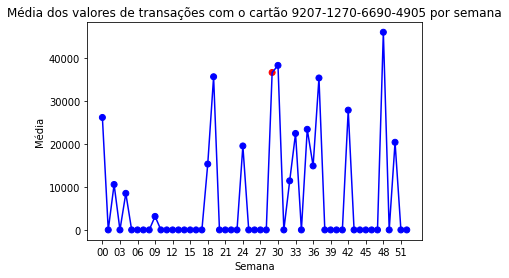

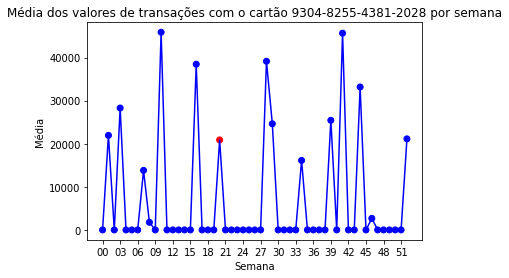

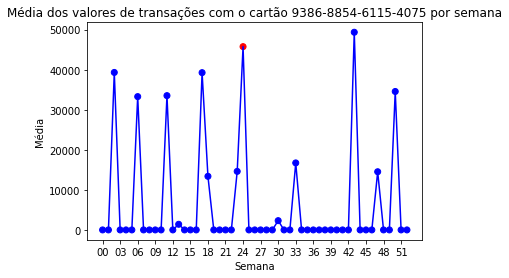

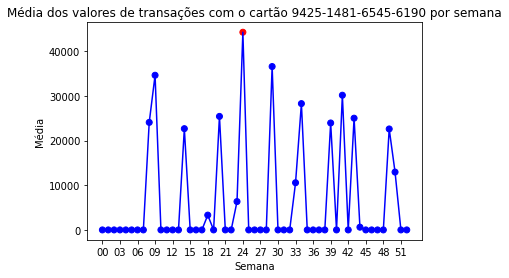

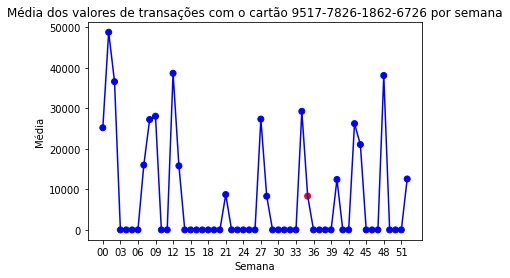

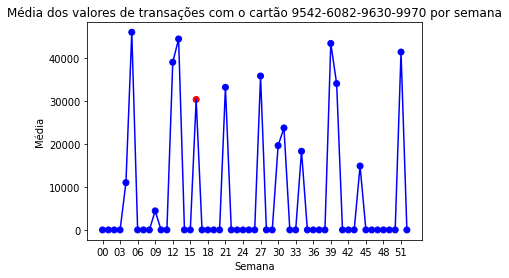

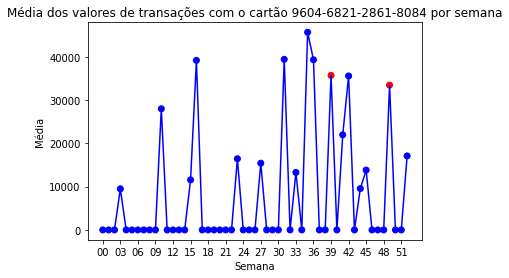

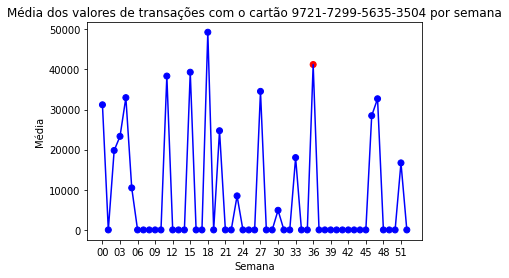

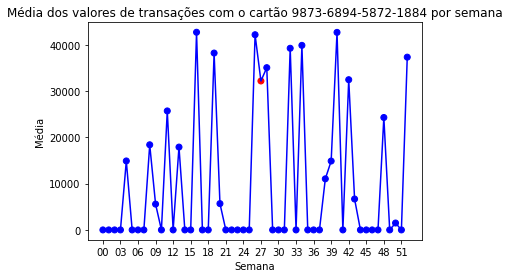

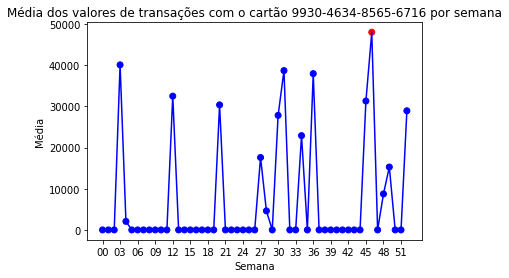

In [38]:
df_means = pd.DataFrame(media, columns=['card_number', 'mean', 'week_number'])

x = np.unique(df_means['week_number'])
for card in np.unique(df_means['card_number']):
  y = df_means['mean'].loc[df_means['card_number'] == card]

  plt.title('Média dos valores de transações com o cartão {} por semana'.format(card))

  weeks = list(map(lambda x: int(x), df_transactions['week_number'].loc[(df_transactions['is_fraud'] == 1) & (df_transactions['card_number'] == card)]))
  colors = []
  for i in range(53):
    if i in weeks:
      colors.append('r')
    else:
      colors.append('b')

  plt.xlabel('Semana')
  plt.ylabel('Média')
  plt.xticks([i for i in range(0, 53, 3)])
  plt.scatter(x, y, c=colors)
  plt.plot(x, y, color='b')
  plt.show()

Os gráficos acima ainda não mostraram nada significativo que "caracterizasse" uma fraude.

In [39]:
df_transactions.corr()

value   segment  is_fraud
value     1.000000 -0.005766  0.014976
segment  -0.005766  1.000000 -0.002513
is_fraud  0.014976 -0.002513  1.000000

Acima vemos que a fraude tem uma correlação fraca com todas as outras variáveis numéricas que definem uma transação.

Decidi ver a correlação que uma fraude tem com os outros dataframes, usando as variáveis numéricas como abaixo.

In [40]:
df_transactions.corrwith(df_customers.vintage_group)

value      -0.018843
segment    -0.007473
is_fraud   -0.018572
dtype: float64

Em todos os que chequei não encontrei nenhuma correlação muito significativa de is_fraud com as outras variáveis. Isto sugere que transações fraudulentas não estão necessariamente associadas a outras features

Chequei ainda o volume de transação diário. Imaginei que alguma fraude pudesse se manifestar em um alto volume de transações em um determinado dia. Entretanto vi que este não era sempre o caso.

(o dia das transações marcadas como fraude estão em vermelho)

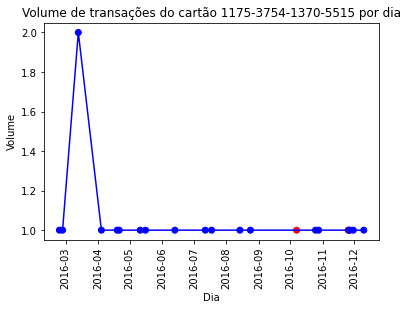

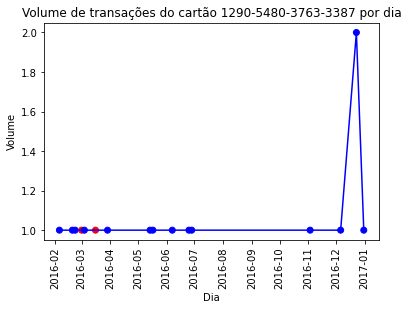

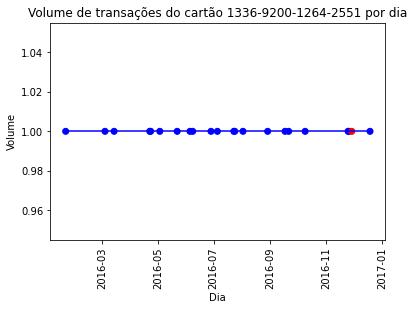

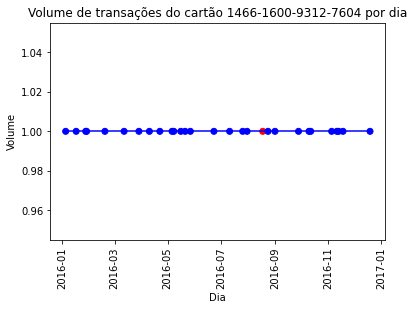

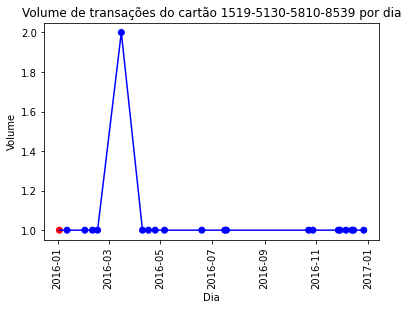

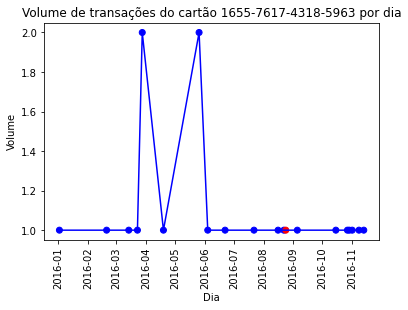

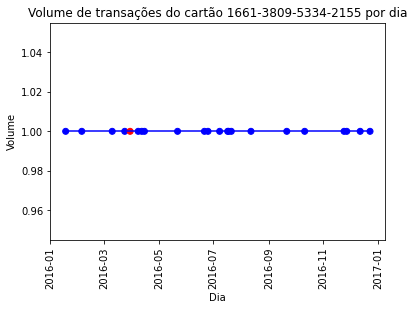

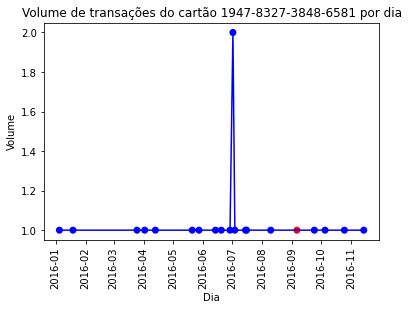

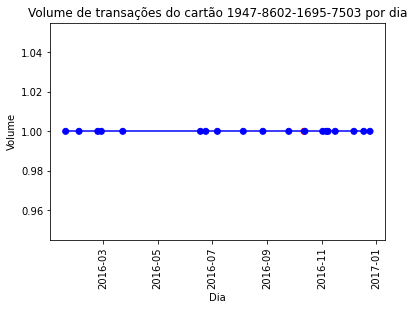

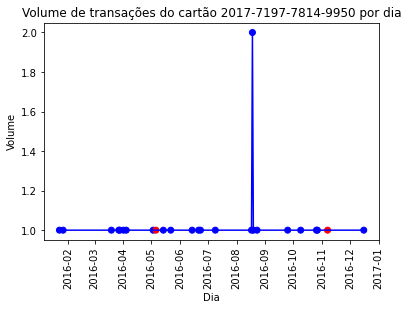

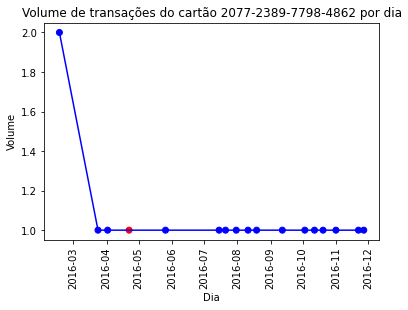

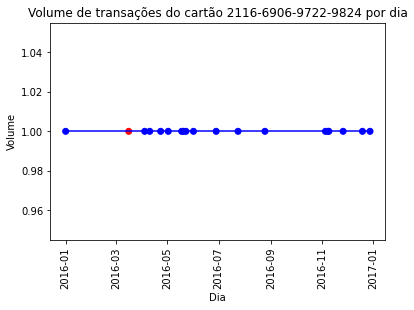

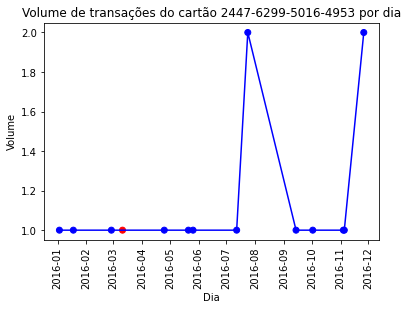

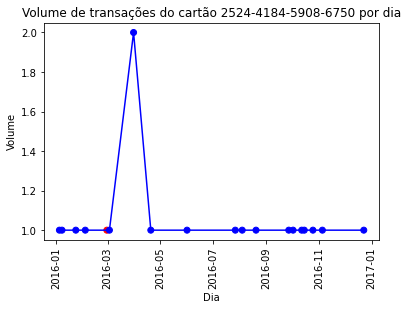

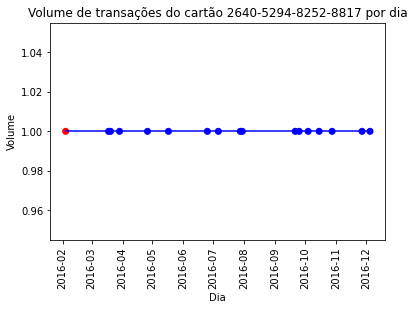

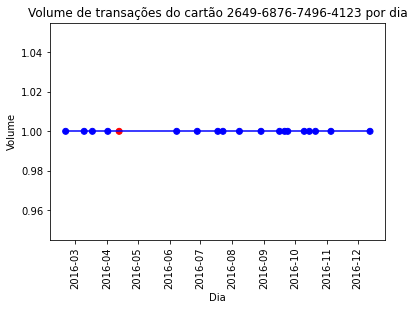

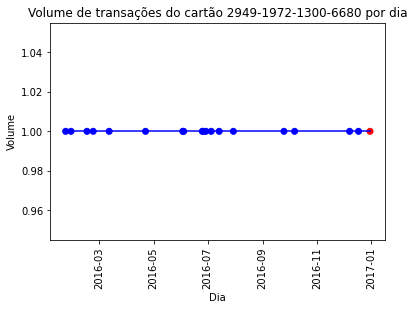

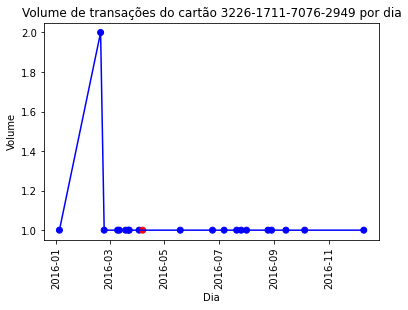

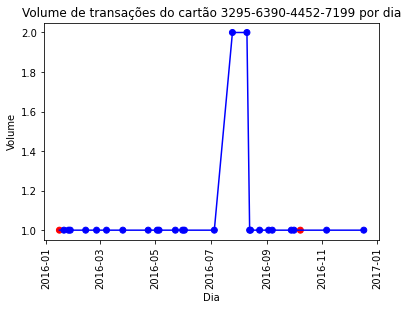

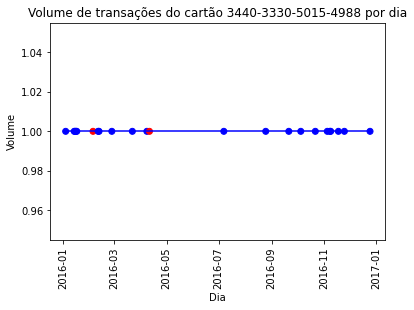

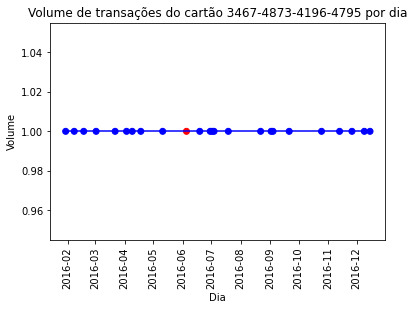

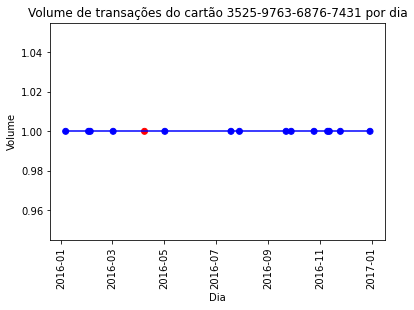

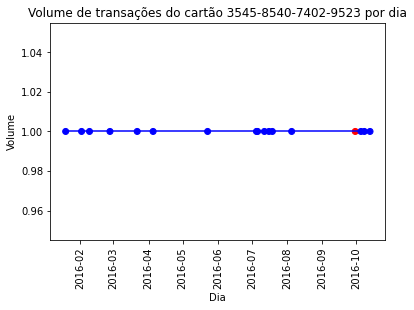

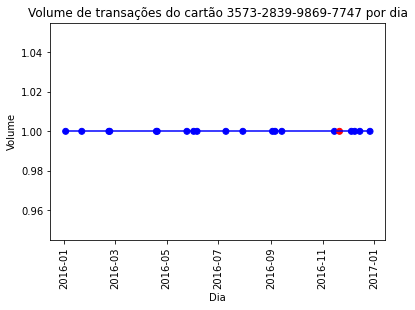

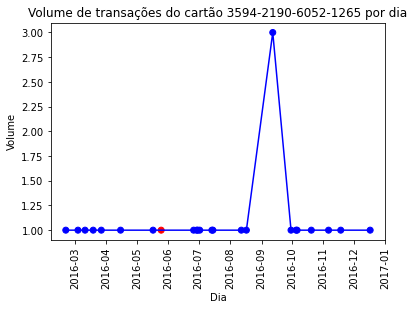

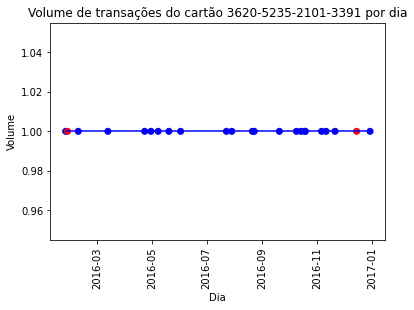

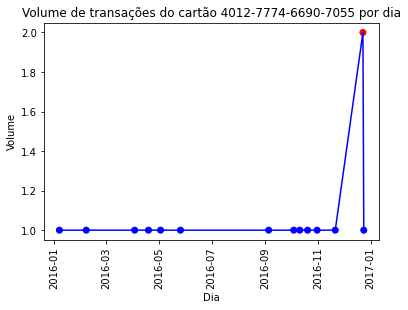

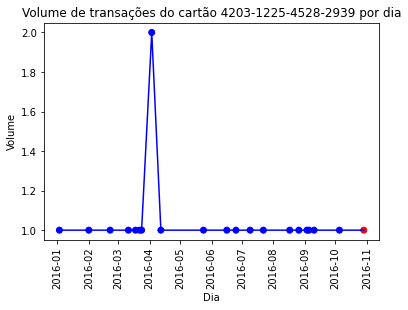

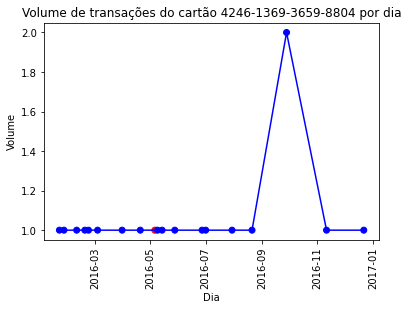

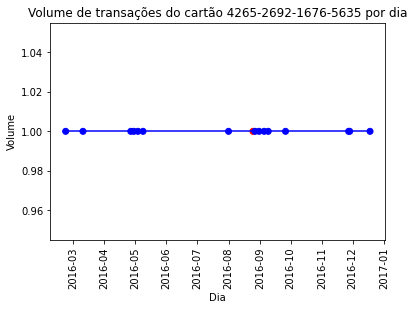

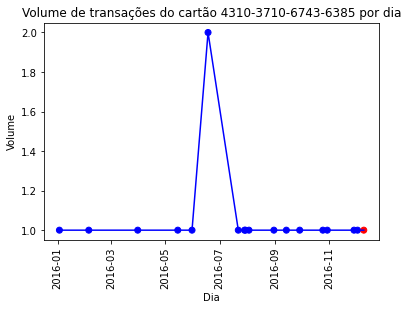

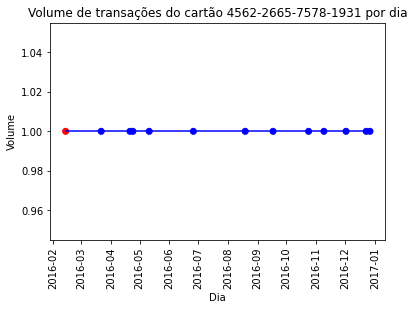

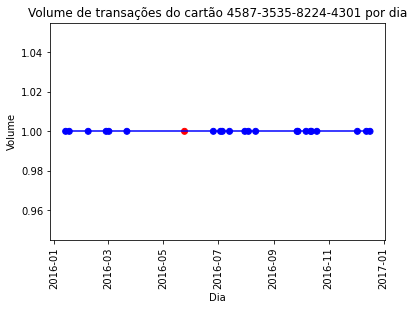

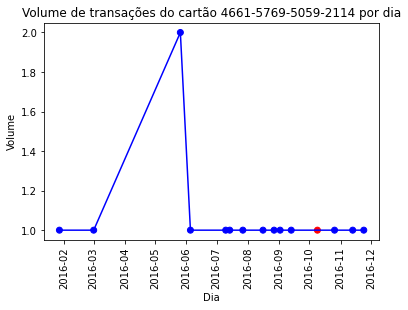

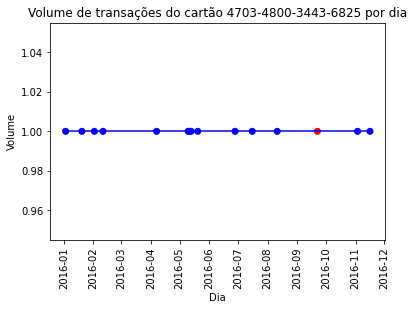

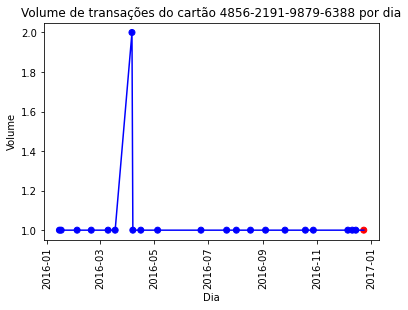

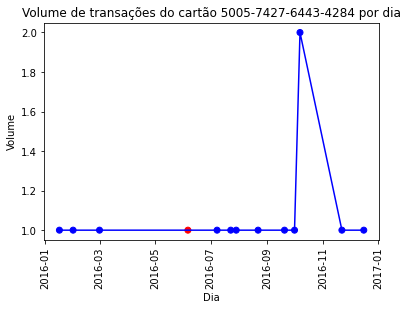

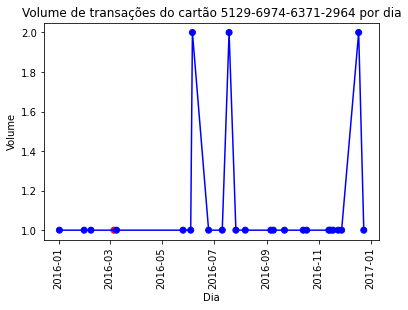

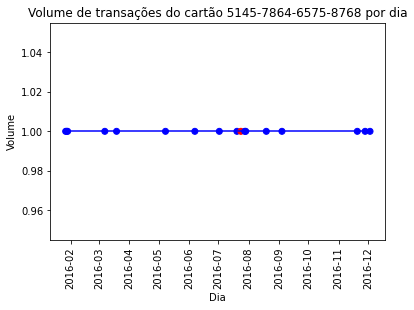

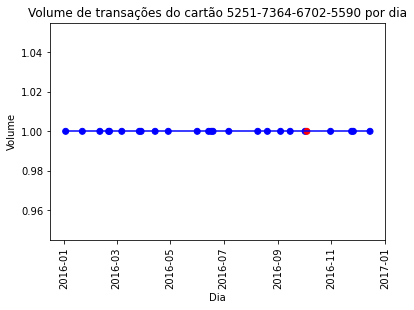

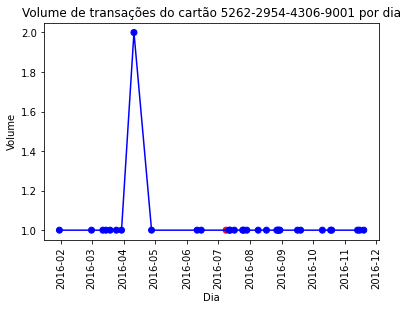

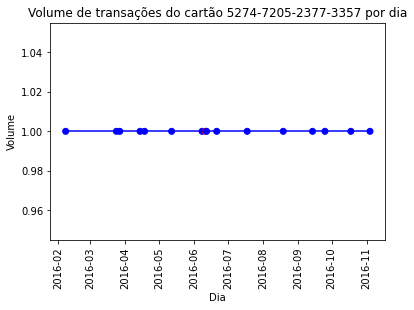

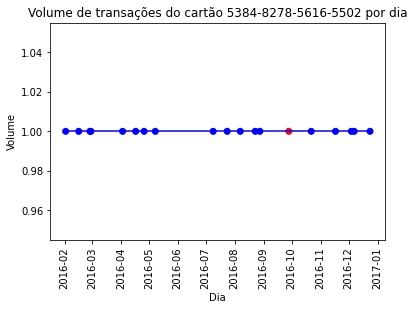

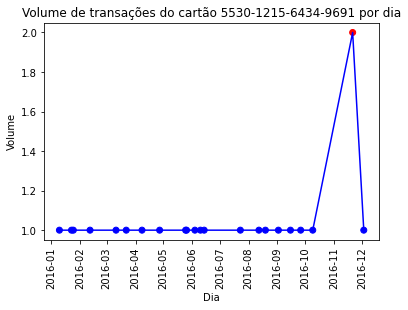

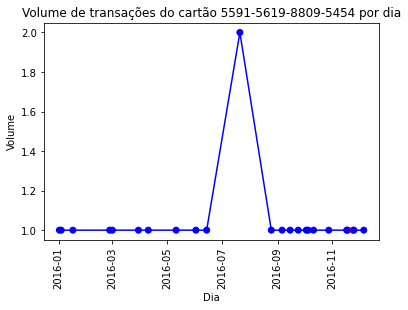

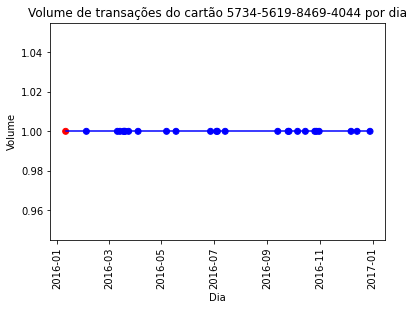

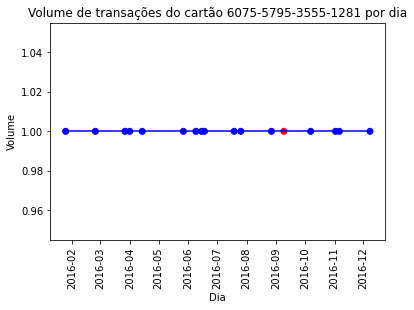

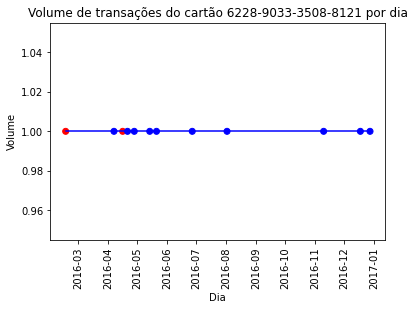

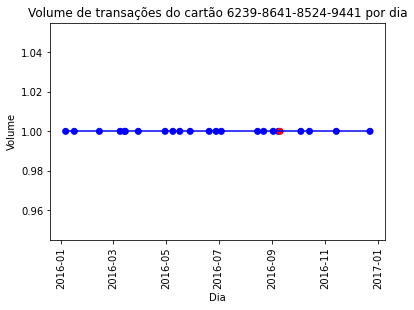

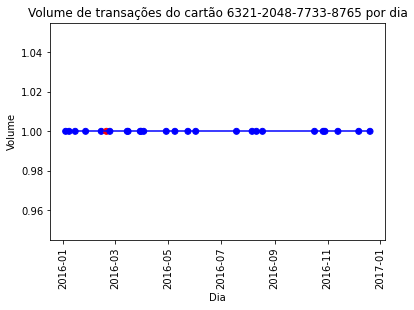

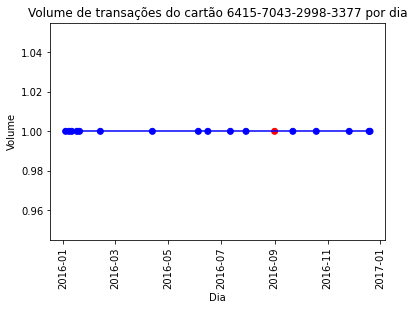

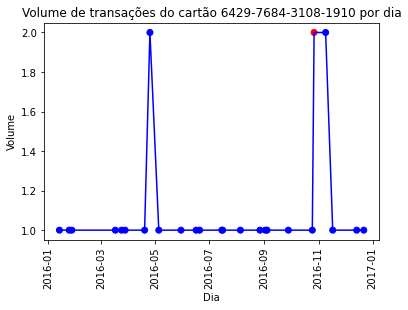

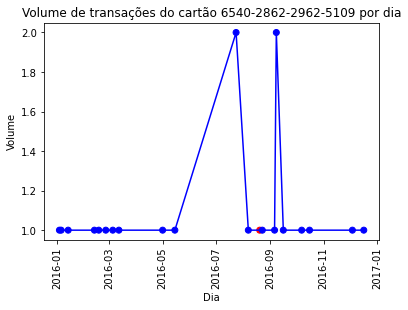

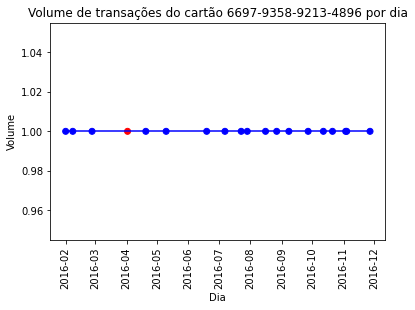

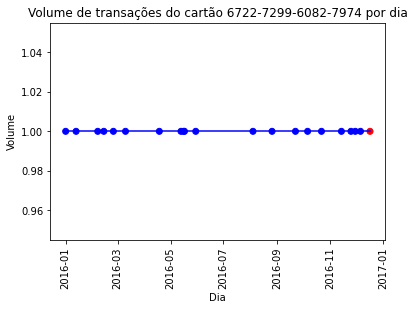

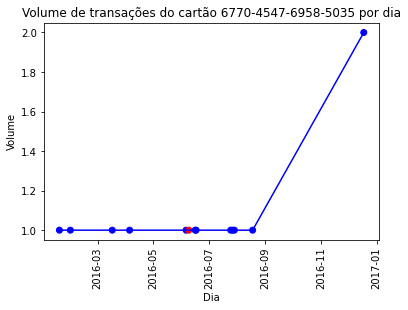

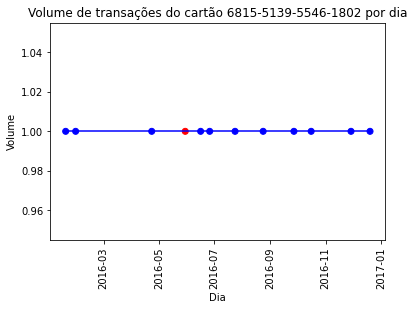

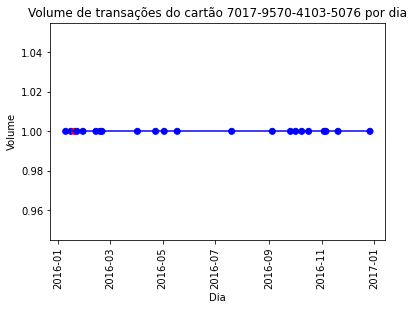

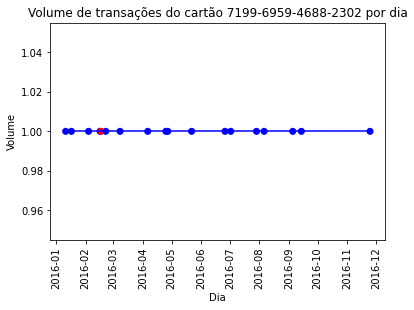

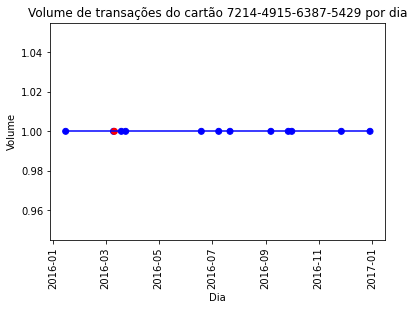

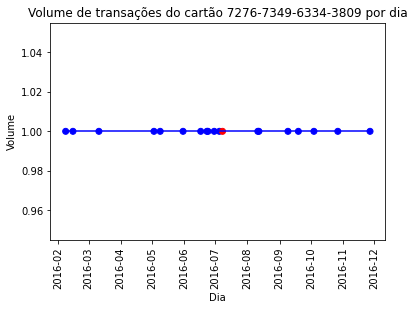

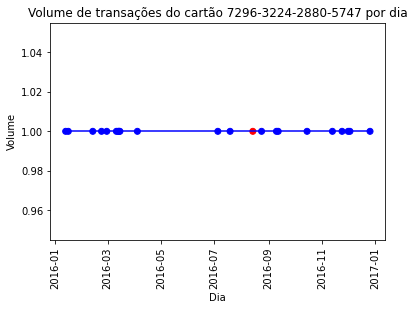

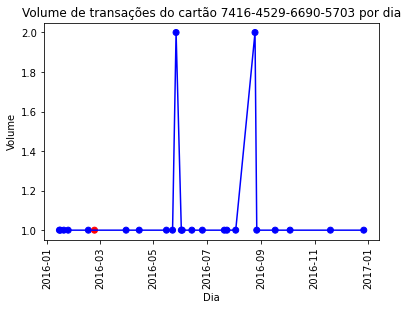

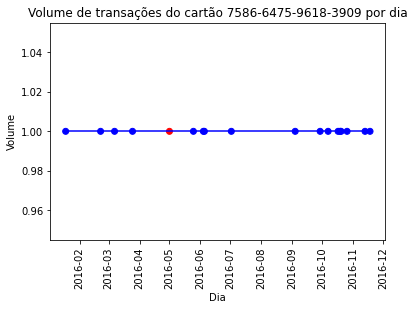

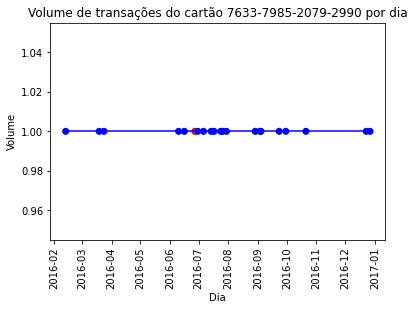

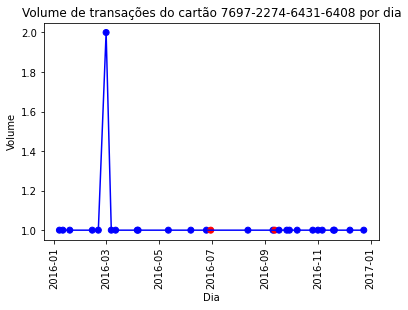

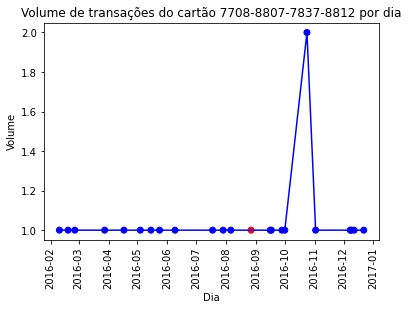

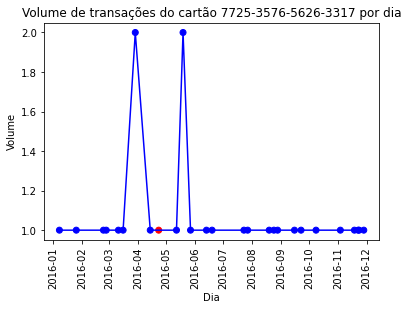

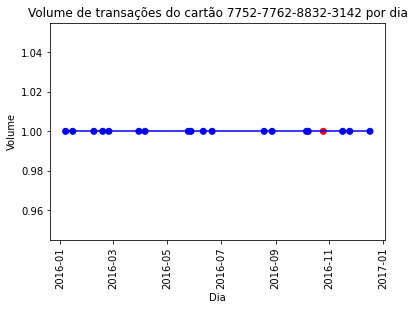

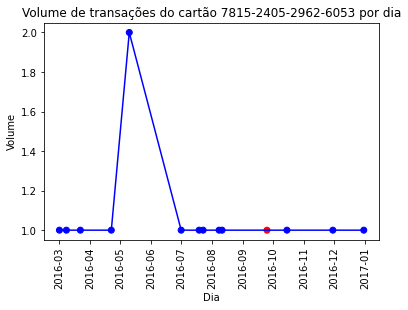

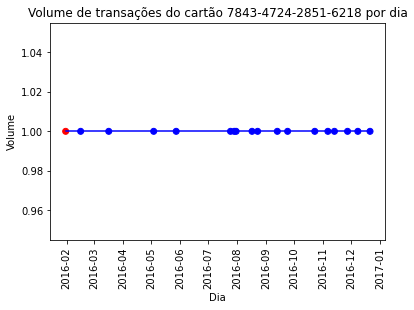

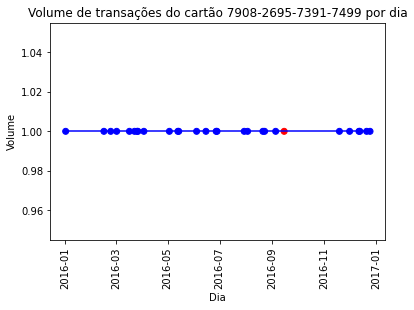

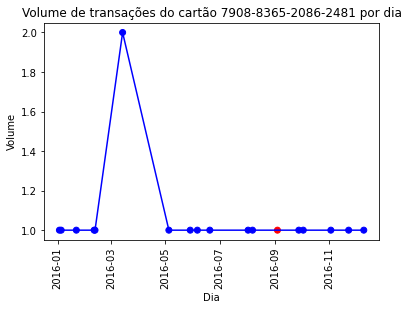

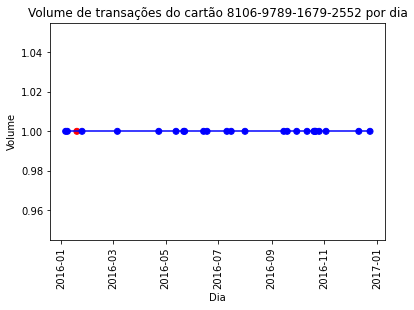

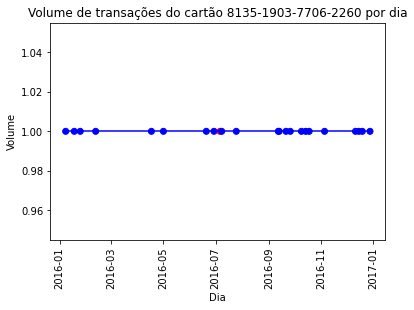

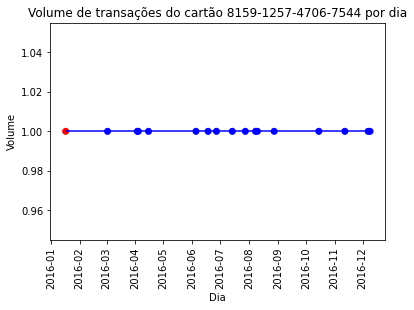

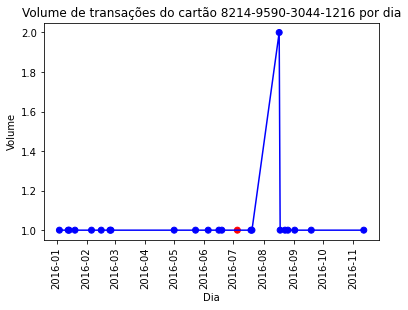

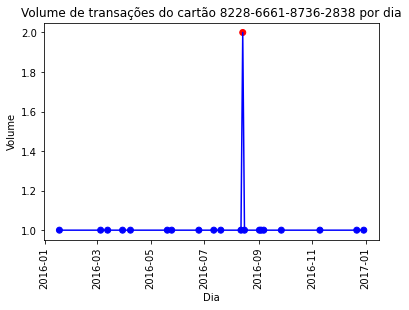

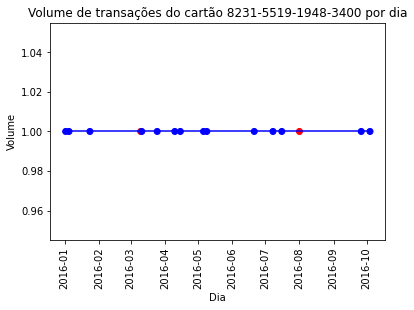

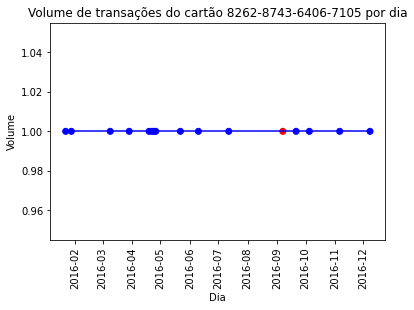

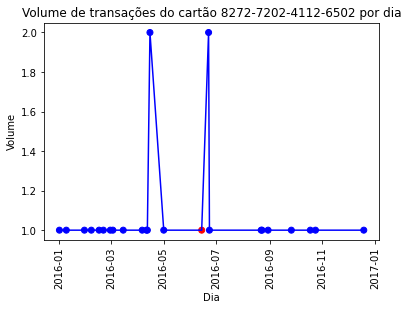

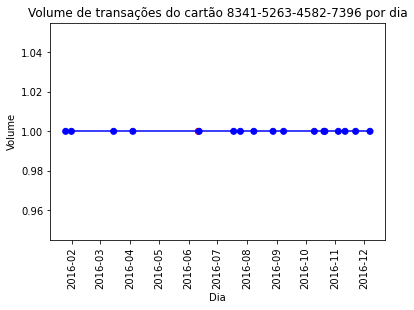

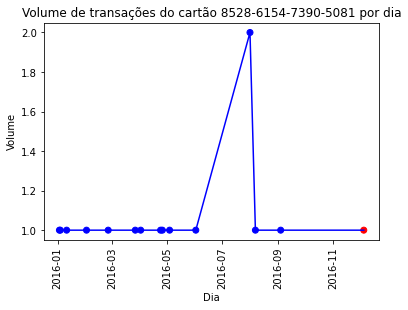

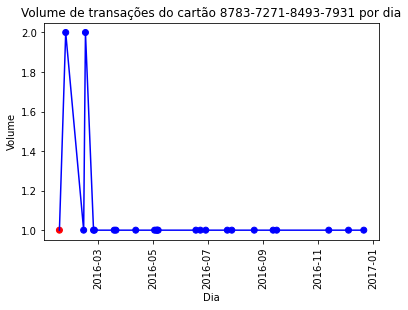

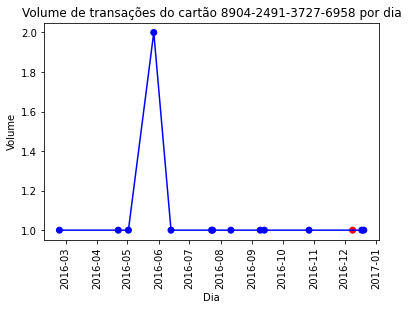

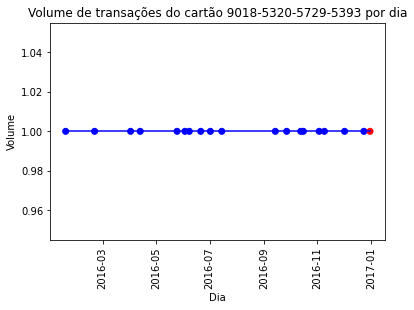

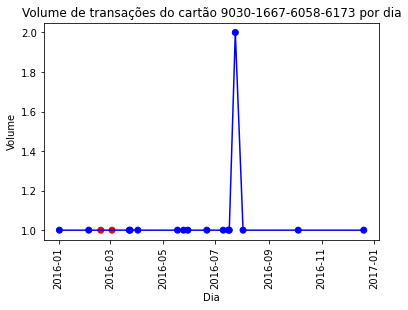

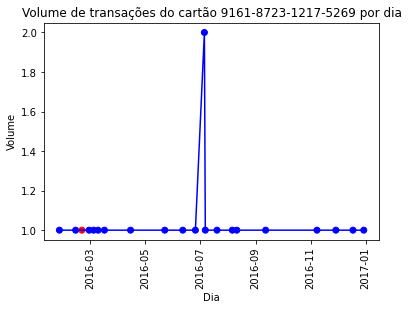

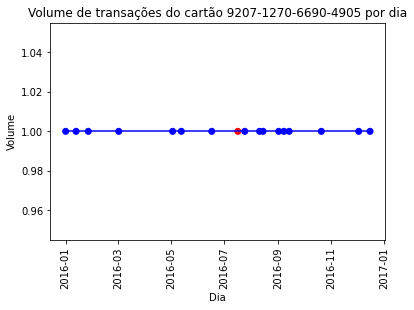

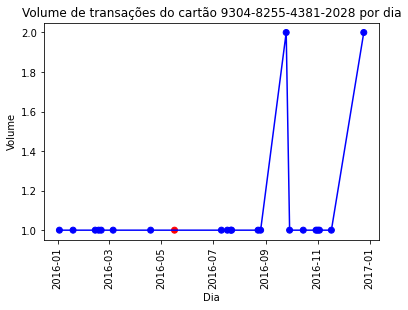

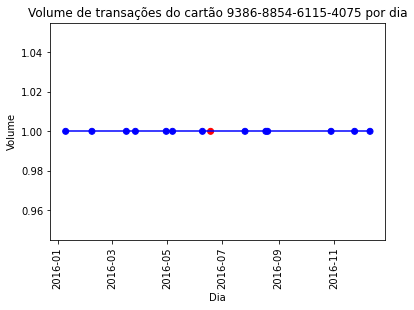

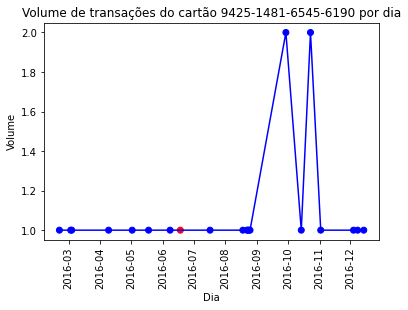

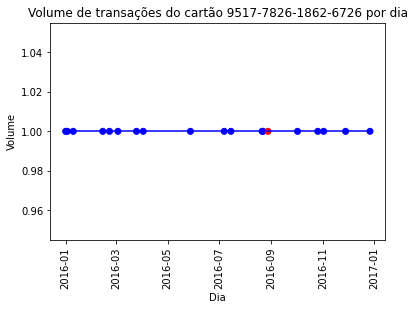

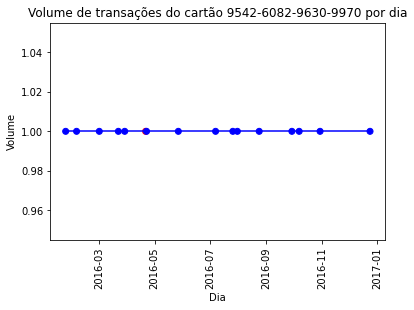

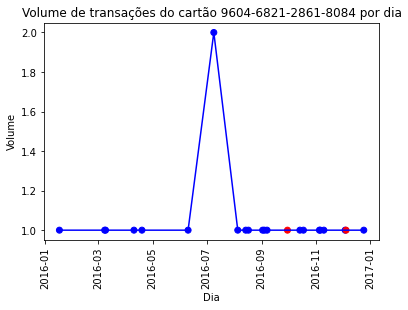

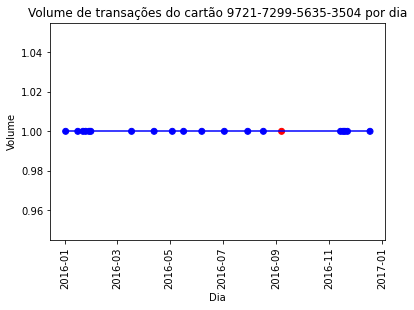

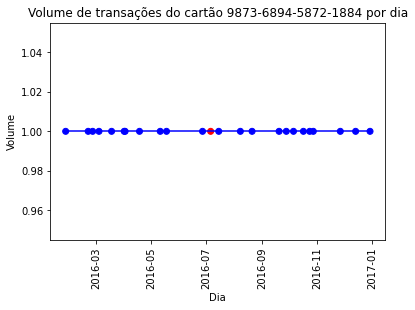

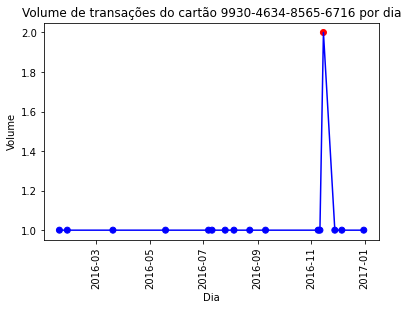

In [41]:
card_frauds = np.unique(df_fraud_transactions['card_number'])

for card in card_frauds:
  days = np.unique(df_transactions['transaction_date'].loc[df_transactions['card_number'] == card])
  y = []
  colors = []
  for day in days:
    fraud_ids = df_fraud_transactions['id'].loc[df_fraud_transactions['card_number'] == card]

    if df_transactions['id'].loc[(df_transactions['transaction_date'] == day) & (df_transactions['card_number'] == card) & (df_transactions['id'].isin(fraud_ids))].count() > 0:
      colors.append('r')
    else:
      colors.append('b')
    y.append(df_transactions['id'].loc[(df_transactions['card_number'] == card) & (df_transactions['transaction_date'] == day)].count())

  plt.title("Volume de transações do cartão {} por dia".format(card))
  plt.plot(days, y, color="b")
  plt.scatter(days, y, color=colors)
  plt.xticks(rotation='vertical')
  plt.xlabel("Dia")
  plt.ylabel("Volume")
  plt.show()

Conclusão: os gráficos que plotei e os dados que analisei sugerem que a fraude não está ligada a alguma feature, ou algum comportamento dos dados.